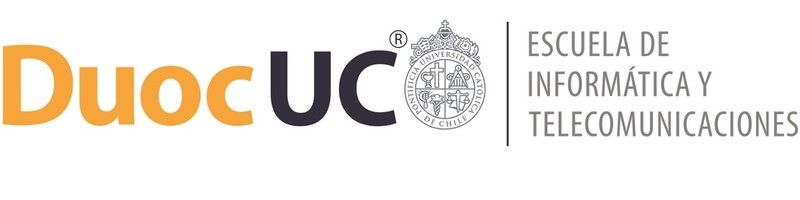

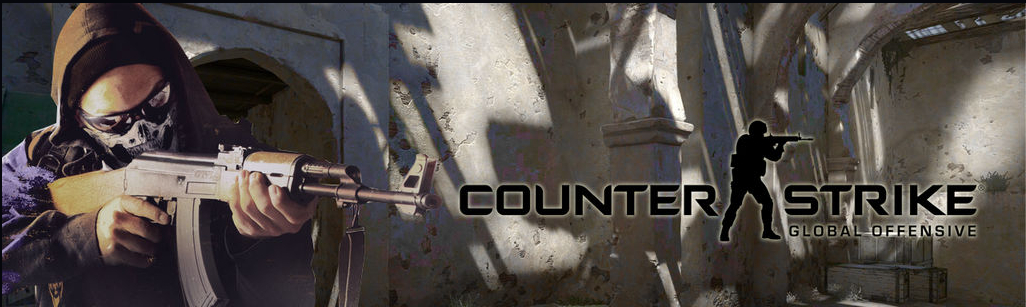

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Tomas Moreno
* Gabriel Toledo
* Vicente Muñoz

Docente:     

Sección: MLY0100 - 003D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

# Fase 1: Business Understanding

##Determinación de los Objetivos (KPI)

KPI 1:


*   Objetivo: Saber el mapa mas jugado de Counter Strike
*   Definicion: El mapa que mas se elije por los jugadores de Counter Strike
*   Formula: Map
*   Unidad: cuenta
*   Frecuencia: Mensual
*   Responsable: Equipo de desarrollo
*   Relevancia: Alta

KPI 2:

* Objetivo: Saber cuantas partidas se ganaron o perdieron
* Definicion: Patidas ganadas o perdidas de un equipo
* Formula: MatchWinner
* Unidad: Cuenta
* Frecuencia: Semanal
* Responsable: Área de desarrollo
* Relevancia: Media

KPI 3:

* Objetivo: Promedio de cuantos headshots se realizan por partida
* Definicion: Headshots realizados por partida
* Formula: MatchHeadshots
* Unidad: Cuenta
* Frecuencia: Semanal
* Responsable: Área de desarrollo
* Relevancia: Alta

# Fase 2: Data Understanding

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Carga de datos
cs = pd.read_csv("/content/Anexo ET_demo_round_traces_2022.csv", sep=';')

# Cambiar la configuración de formato de Pandas para mostrar enteros sin decimales
pd.set_option('display.float_format', lambda x: '{:.0f}'.format(x))
pd.set_option('display.max_columns', 40)
cs.head()

<ipython-input-2-e2ee3d889400>:2: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  cs = pd.read_csv("/content/Anexo ET_demo_round_traces_2022.csv", sep=';')


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0,0,0,0,1,0.0,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0,0,0,0,1,0.0,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0,0,0,0,1,0.0,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0,0,0,0,1,0.0,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0,0,0,0,1,0.0,0,0,0,0,1000,4400,0,0,0,0


In [ ]:
print("Tamaño del conjunto de datos:", cs.shape)

Tamaño del conjunto de datos: (79157, 30)


## Exploracion de datos iniciales

In [ ]:
#informacion de cada columna y tipo de dato
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

* Podemos ver que hay 2 datos de tipo booleanos, 4 de tipo float64, 17 de tipo int64 y 7 de tipo object.
* Tambien se ve cuanta memoria se esta usando
* La columna que se llama unnamed 0 es una columna que no tiene nombre y por defecto, pandas le da ese nombre para poder analizarlo

Ahora veremos cuantos valores tienen algunas columnas y cuantas veces se repite

In [ ]:
cs.Map.value_counts()

Map
de_inferno    28869
de_dust2      19120
de_mirage     19019
de_nuke       12149
Name: count, dtype: int64

In [ ]:
cs.Team.value_counts()

Team
Terrorist           39591
CounterTerrorist    39564
Name: count, dtype: int64

In [ ]:
cs.RoundWinner.value_counts()

RoundWinner
False     23195
True      23194
False     16393
True      16374
False4        1
Name: count, dtype: int64

In [ ]:
cs.PrimaryAssaultRifle.unique()

array([0.        , 1.        , 0.76213592, ..., 0.33451327, 0.72428884,
       0.95052632])

In [ ]:
cs.MatchWinner.value_counts()

MatchWinner
False    42017
True     37139
Name: count, dtype: int64

In [ ]:
cs.RLethalGrenadesThrown.value_counts()

RLethalGrenadesThrown
0    43838
1    31266
2     3955
3       95
4        3
Name: count, dtype: int64

In [ ]:
cs.TeamStartingEquipmentValue.unique()

array([ 4400,  3750,  1300, 19950,  2000, 22850, 23350, 25100,  1700,
       26600, 23600, 26700, 23400, 20400, 29250,  1800, 28750, 23700,
       22650, 23300, 29450,  1400, 29150, 22000, 29350, 23050, 25950,
        4050,  3650,  7550, 12350, 10400, 22250,  1200, 24750, 20500,
       26200, 27050, 23500, 27500,  9000, 25400,  7800,  5900,  2150,
       16900,  5500,  6300,  5200,  1000,  9700,  9400,  9200,   800,
        6900, 14300, 10800, 10050,  2300,  5350,  6150,  9850,  4100,
       16850, 25800, 27550, 18200, 24900, 20800, 25300, 12550, 20000,
        3700, 29700, 30300,  6100, 30600, 22700, 30700, 11800,  4500,
        1500, 16150, 23550, 26000, 19900, 26400, 23200, 27100, 19550,
       27400,  5750, 21850, 12300, 18100, 16600,  1100, 24450, 21150,
       25450, 25750, 28800, 25050, 30000, 28350, 25650,  5100, 25150,
       25350, 19300, 25850,  1900, 27650,  4150,  4250, 17500, 17850,
        2400, 22100, 30550, 23800, 28500, 24300, 13550,   600, 18800,
       11600, 15950,

In [ ]:
#Verificamos cuantos datos nulos existen en cada columna de datos
cs.isna().sum()

Unnamed: 0                     0
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int

Se puede ver que existen en total 3 valores nulos, 2 en la columna team y 1 en la columna MatchWinner

In [ ]:
#Procederemos a sacar los datos estadisticos de cada columna
cs.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,79157,60570,36437,600,30830,56720,90639,123779
InternalTeamId,79157,2,1,1,1,2,2,2
MatchId,79157,251,150,4,128,236,373,511
RoundId,79157,13,7,1,6,12,19,36
RLethalGrenadesThrown,79157,0,1,0,0,0,1,4
RNonLethalGrenadesThrown,79157,1,1,0,0,1,2,6
PrimaryAssaultRifle,79157,1,0,0,0,1,1,1
PrimarySniperRifle,79157,0,0,0,0,0,0,1
PrimaryHeavy,79157,0,0,0,0,0,0,1
PrimarySMG,79157,0,0,0,0,0,0,1


In [ ]:
# Ahora se mostraran los datos estadisticos de las columnas de tipo object y bool
cs.describe(include=['object','bool'])

,Map,Team,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,FirstKillTime
count,79157,79155,79157,79156,79157,79157,79157,79157,79157
unique,4,2,5,2,2,1,51627,78001,33855
top,de_inferno,Terrorist,False,False,False,False,0.0,0.0,0.0
freq,28869,39591,23195,42017,47214,79157,68,272,5305


## Revision de valores atipicos

In [ ]:
# Seleccionamos las columnas que se van a analizar para los valores atipicos
columnas_a_limpiar = cs.select_dtypes(include=['float64','int64'])
# Creamos un contador de valores atipicos (outliers)
outliers_count = {}
# Iterar sobre las columnas que se van a limpiar
for columna in columnas_a_limpiar:
    mean = cs[columna].mean()
    std_dev = cs[columna].std()

    # Se definen los criterios de corte (dependiendo de los datos y la cantidad que se manejen, se elije un valor a multiplicar, si se van a eliminar o cambiar los)
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev

    # Contar los valores atípicos en la columna actual
    outliers = cs[(cs[columna] < lower_bound) | (cs[columna] > upper_bound)][columna]
    outliers_count[columna] = len(outliers)

# Mostrar los resultados
print('Cantidad de valores atípicos en cada columna:')
for columna, count in outliers_count.items():
    print(f'Columna {columna}: {count} valores atípicos')

Cantidad de valores atípicos en cada columna:
Columna Unnamed: 0: 0 valores atípicos
Columna InternalTeamId: 0 valores atípicos
Columna MatchId: 0 valores atípicos
Columna RoundId: 10 valores atípicos
Columna RLethalGrenadesThrown: 98 valores atípicos
Columna RNonLethalGrenadesThrown: 120 valores atípicos
Columna PrimaryAssaultRifle: 0 valores atípicos
Columna PrimarySniperRifle: 6479 valores atípicos
Columna PrimaryHeavy: 493 valores atípicos
Columna PrimarySMG: 575 valores atípicos
Columna PrimaryPistol: 0 valores atípicos
Columna RoundKills: 591 valores atípicos
Columna RoundAssists: 816 valores atípicos
Columna RoundHeadshots: 530 valores atípicos
Columna RoundFlankKills: 573 valores atípicos
Columna RoundStartingEquipmentValue: 0 valores atípicos
Columna TeamStartingEquipmentValue: 0 valores atípicos
Columna MatchKills: 275 valores atípicos
Columna MatchFlankKills: 1184 valores atípicos
Columna MatchAssists: 781 valores atípicos
Columna MatchHeadshots: 724 valores atípicos


Podemos ver que existen muchos datos atipicos en ciertas columnas, antes de eliminar este tipo de datos, primero se tiene que solucionar el problema de los valores nulos, que se hara en la fase 3, una ves solucionado eso, se vera la cantidad de datos atipicos que existen y si vale la pena borrarlo o no

## Comprobar si existen columnas duplicadas

In [ ]:
cs.duplicated().sum()

0

Podemos ver que no existen columnas duplicadas

## Modelando los datos con graficos

### graficos de densidad

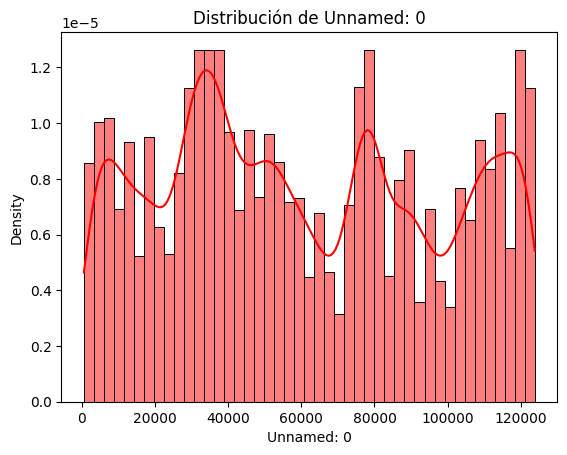

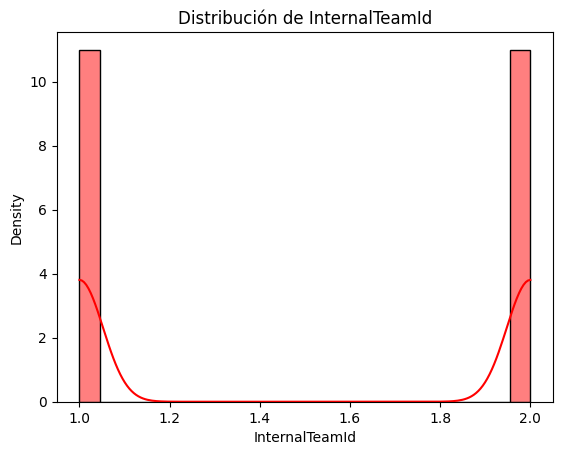

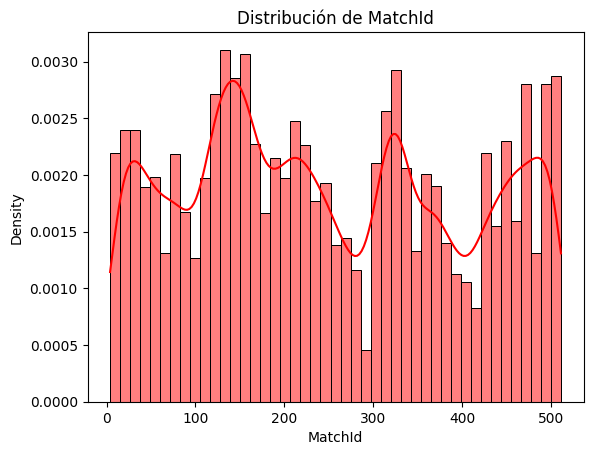

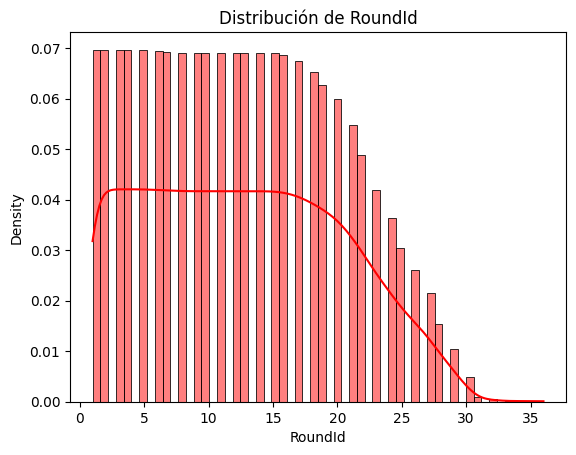

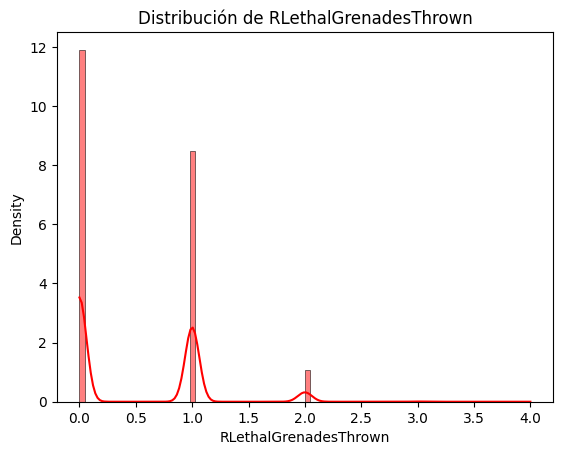

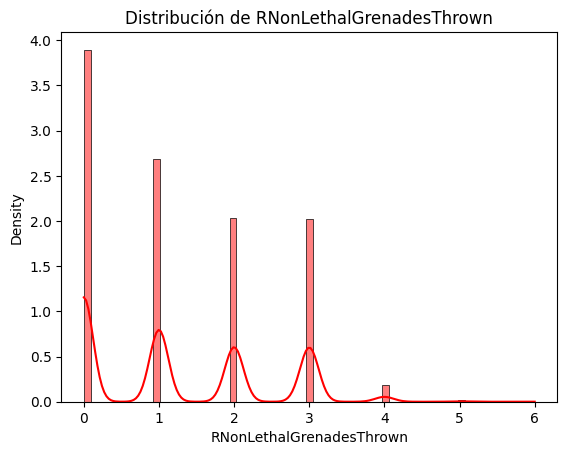

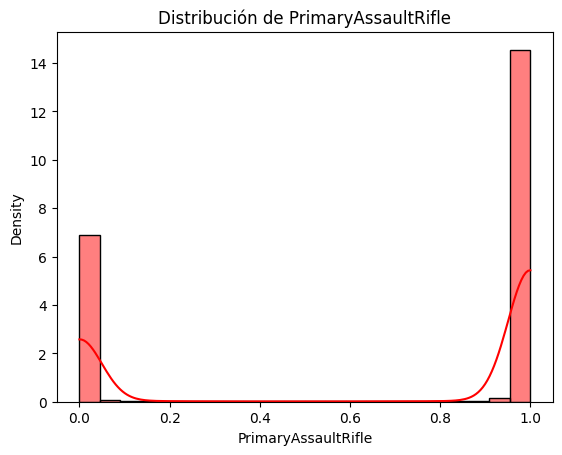

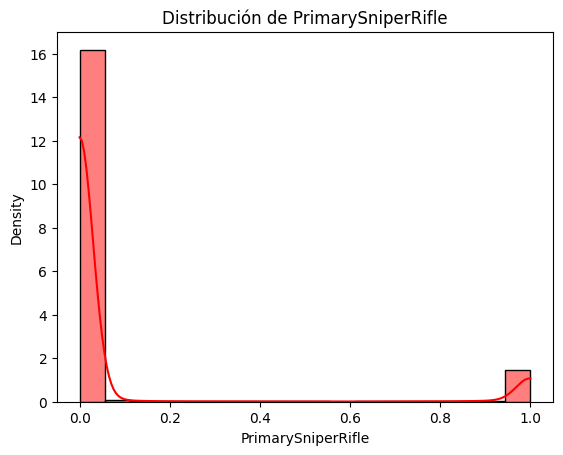

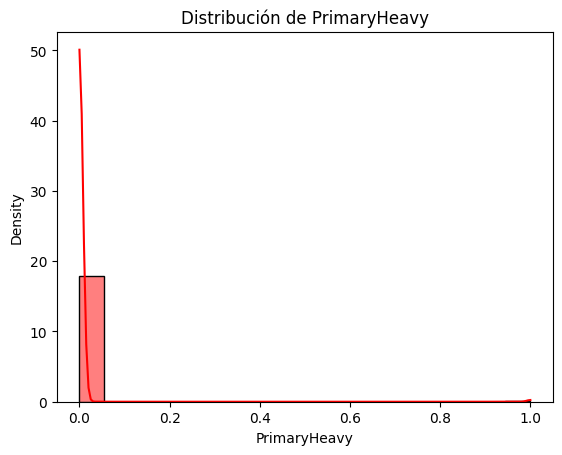

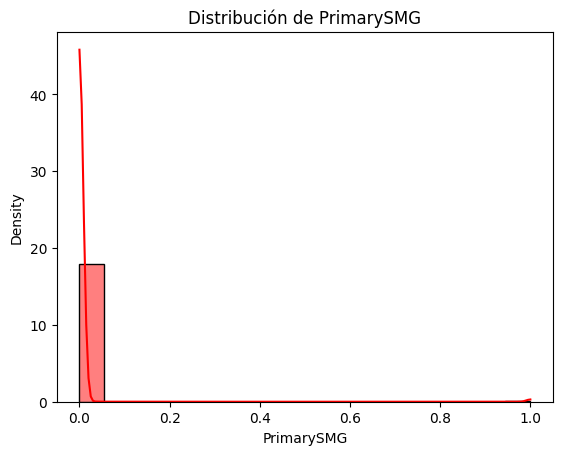

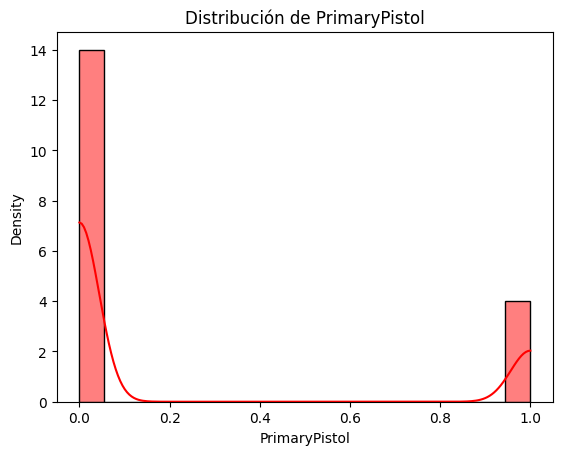

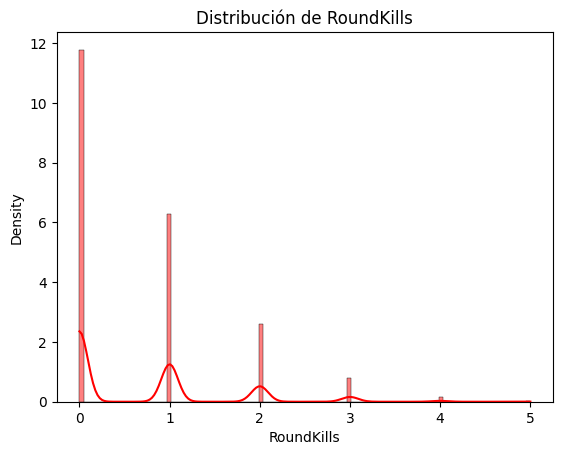

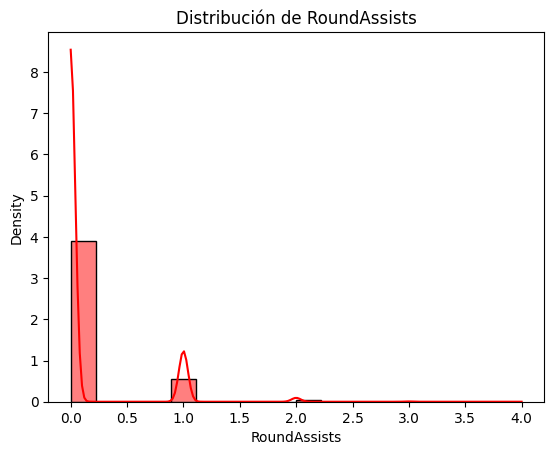

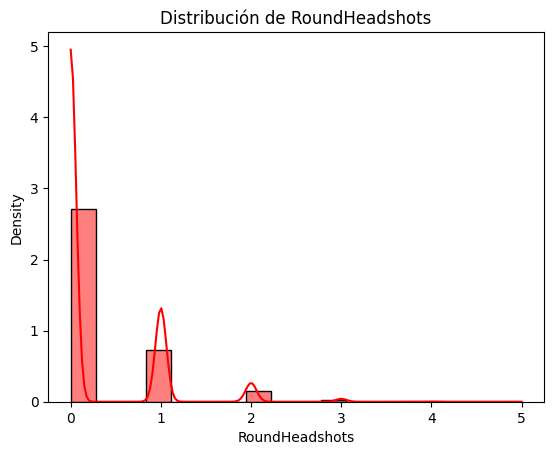

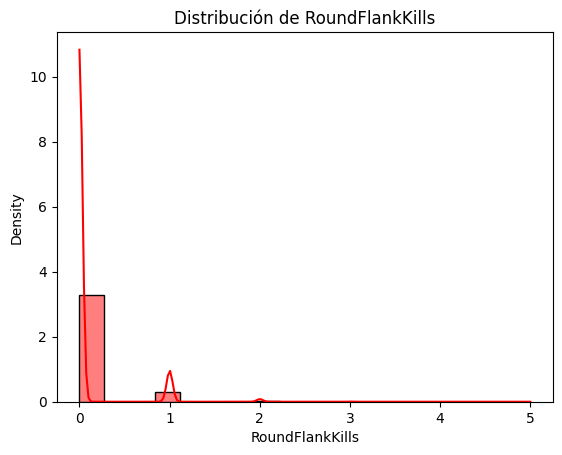

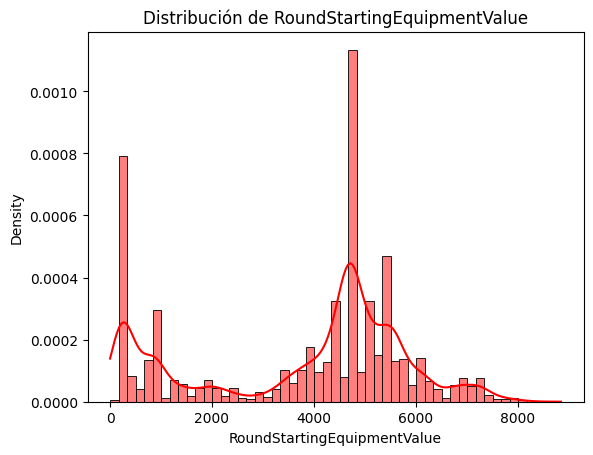

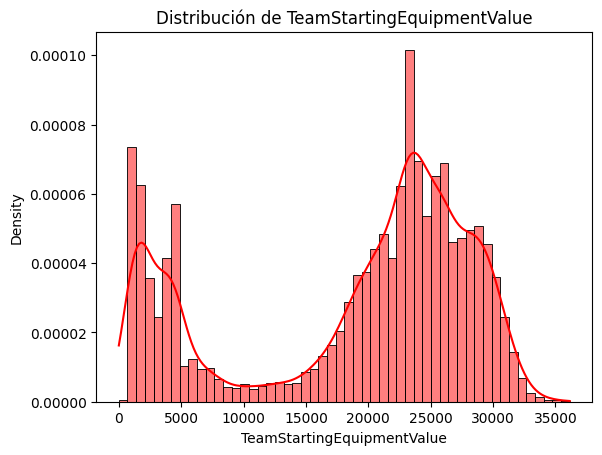

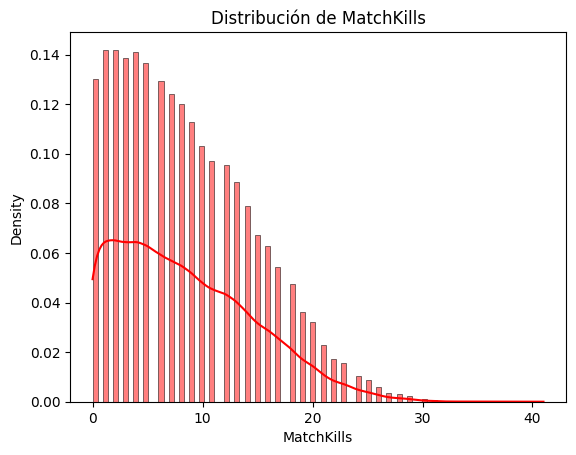

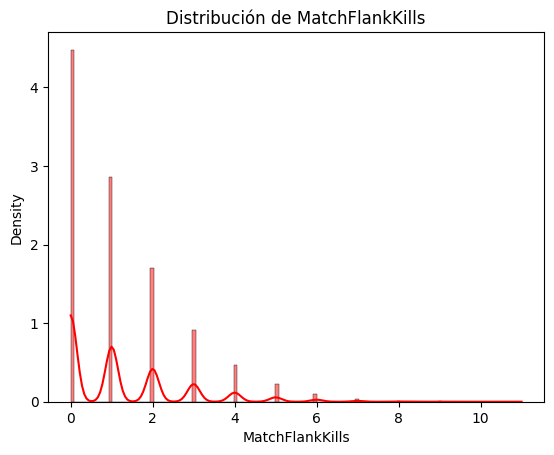

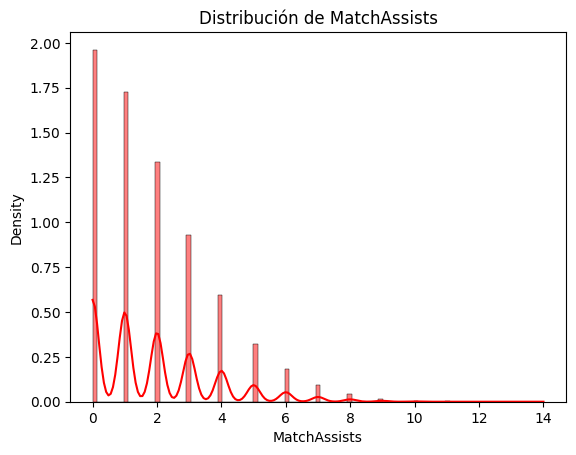

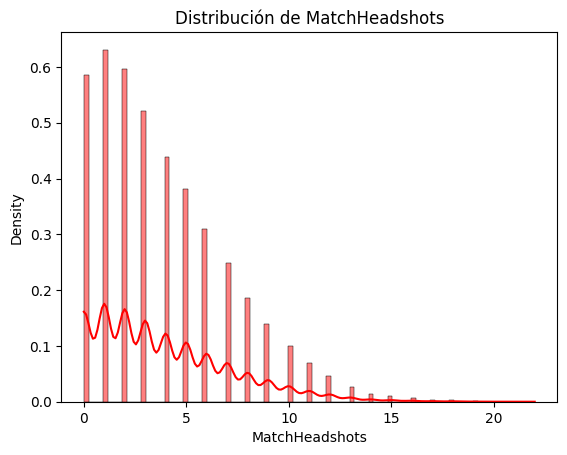

In [ ]:
# Para hacer el trabajo mas rapido y no hacerlo columna por columna, podemos hacer un grafico con todos los valores de tipo int64 o float64 con un for
for i in cs.select_dtypes(include=[np.number]).columns:
    plt.figure()
    sns.histplot(cs[i], kde=True, color='red', stat='density', element='bars')
    plt.title(f'Distribución de {i}')
    plt.show()

### Graficos de frecuencias

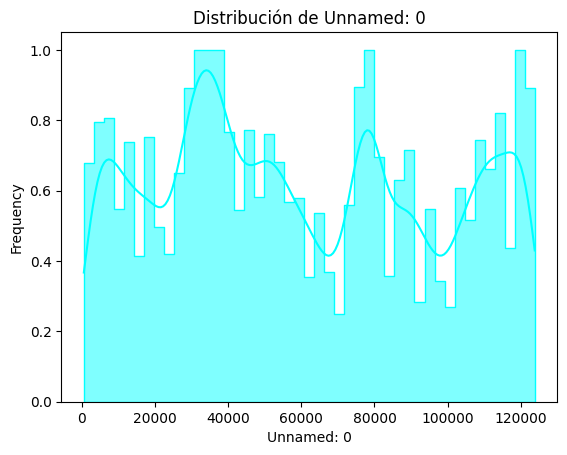

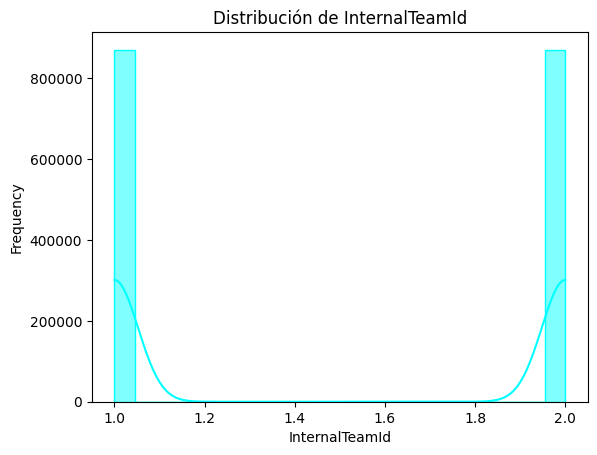

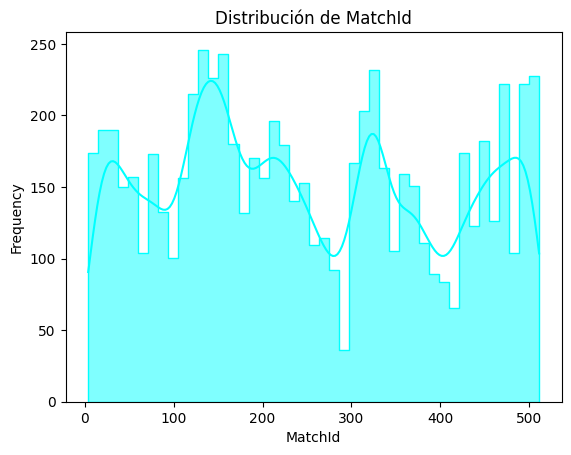

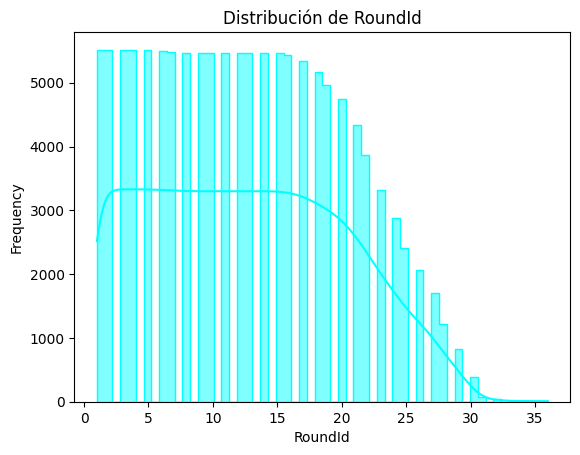

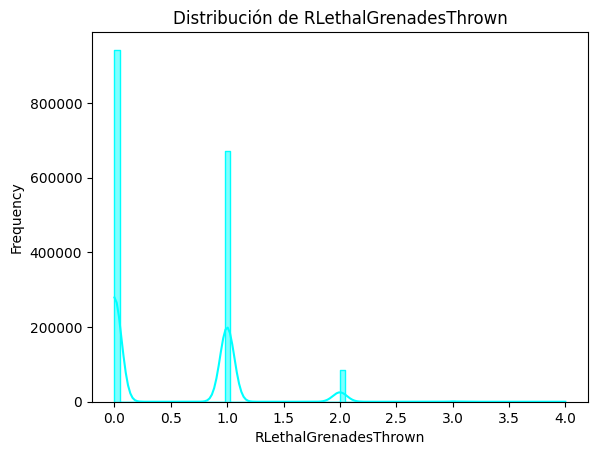

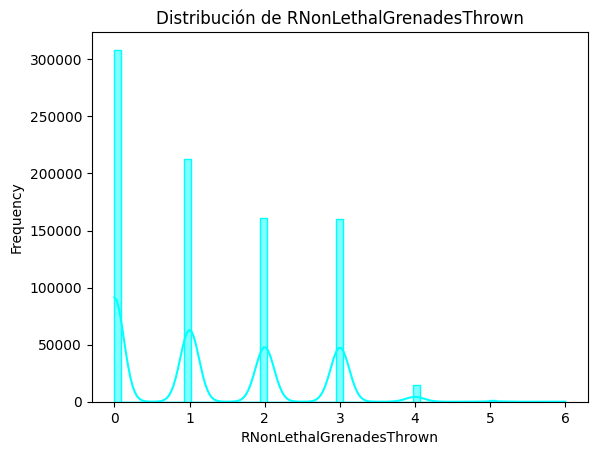

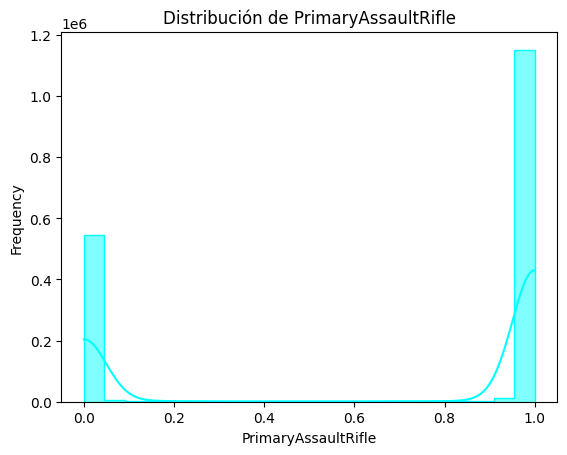

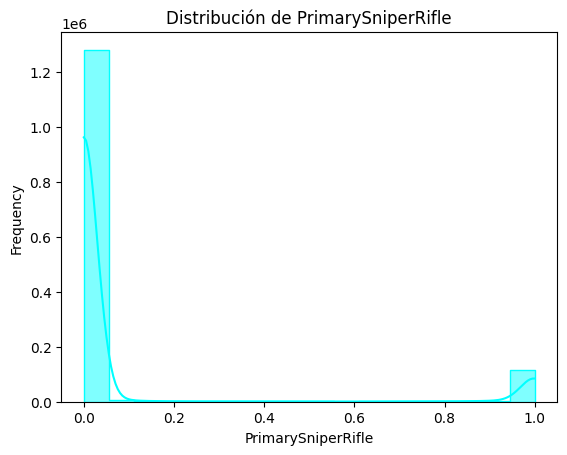

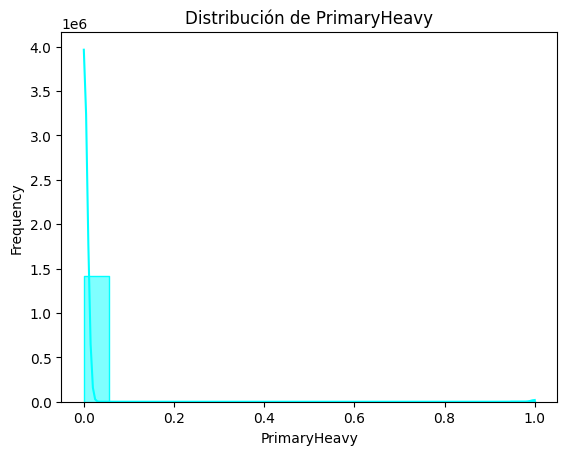

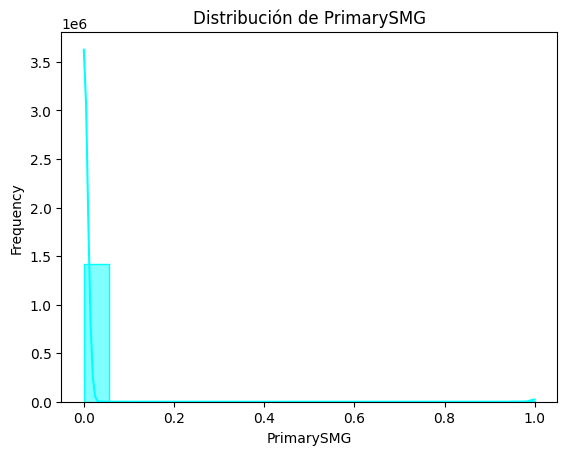

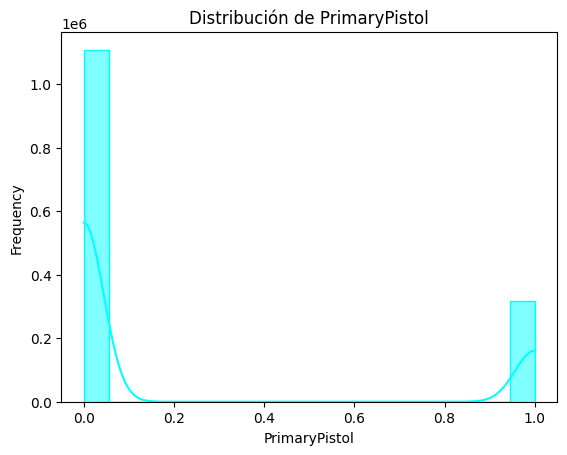

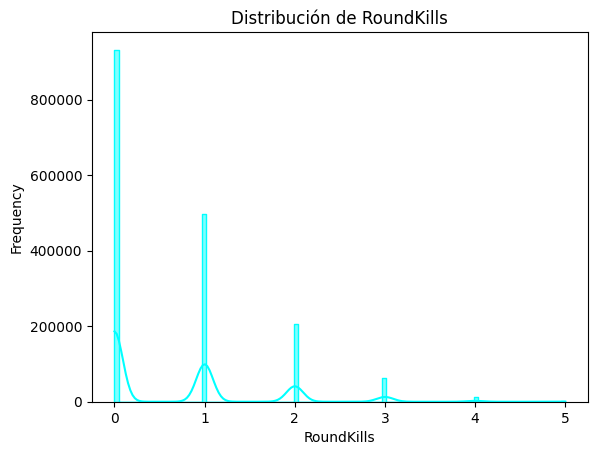

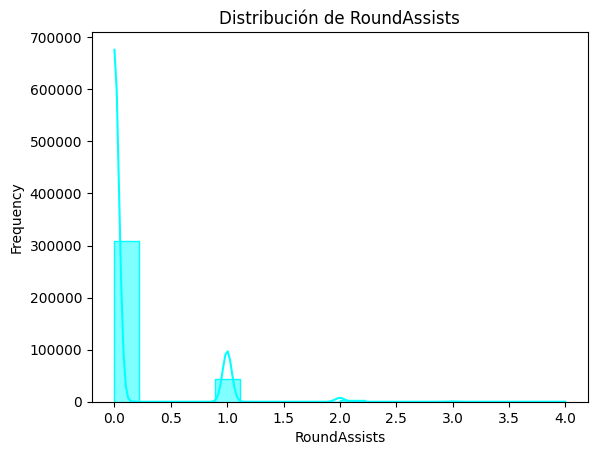

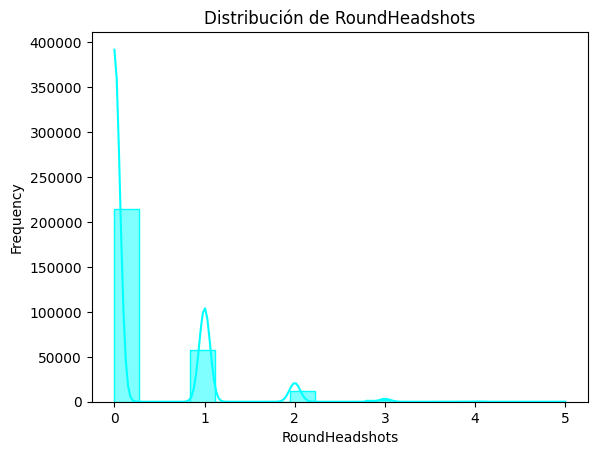

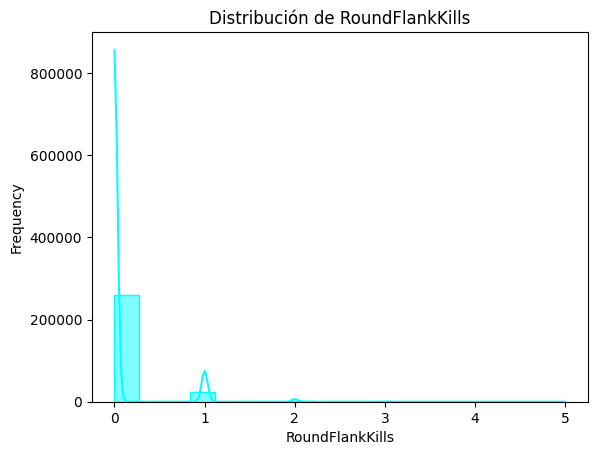

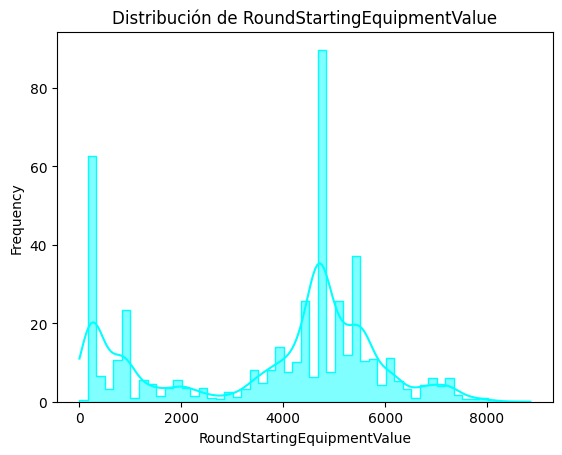

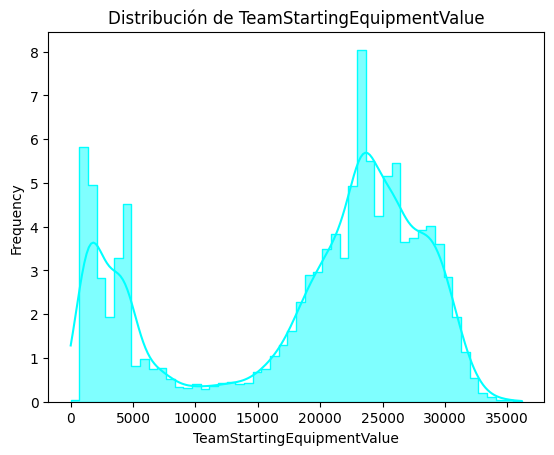

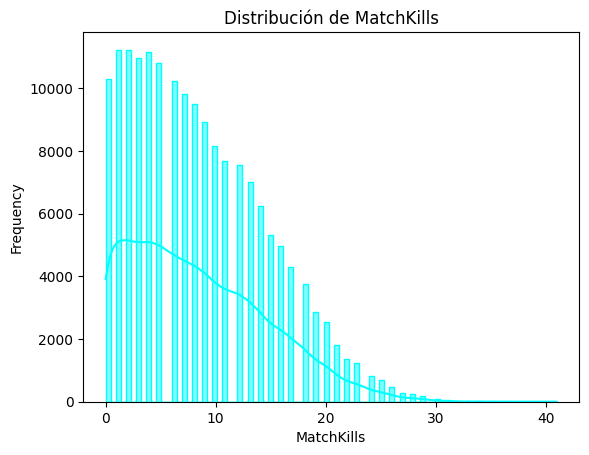

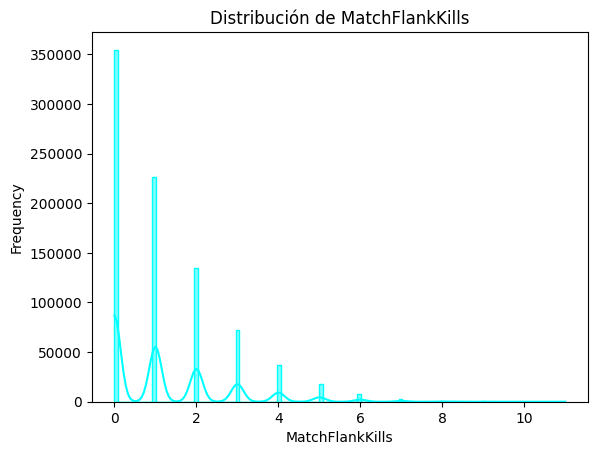

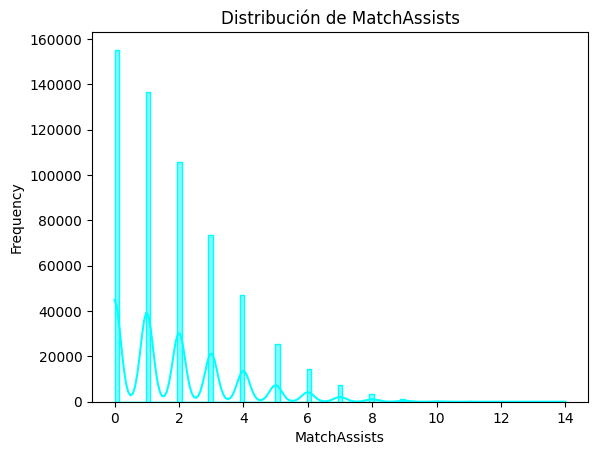

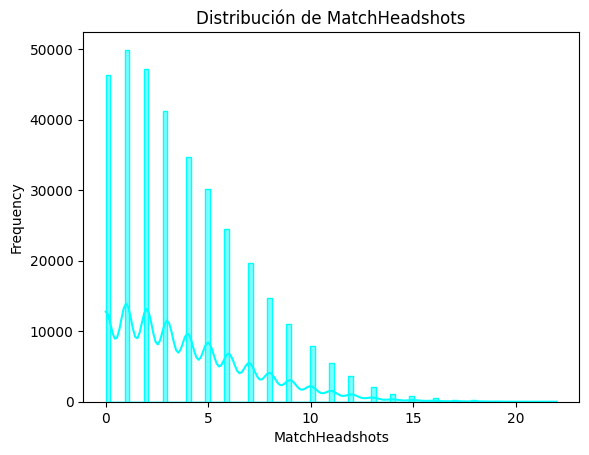

In [ ]:
for i in cs.select_dtypes(include=[np.number]).columns:
    plt.figure()
    sns.histplot(cs[i], kde=True, color='cyan', stat='frequency', element='step')
    plt.title(f'Distribución de {i}')
    plt.show()

### Graficos de porcentajes

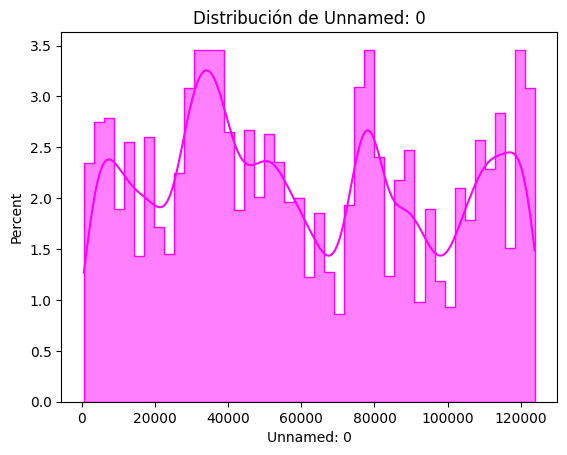

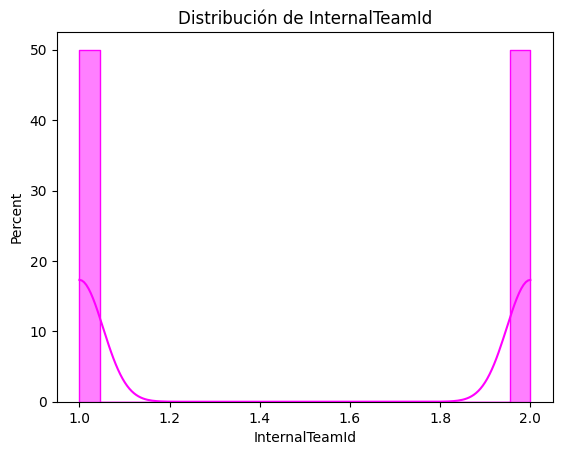

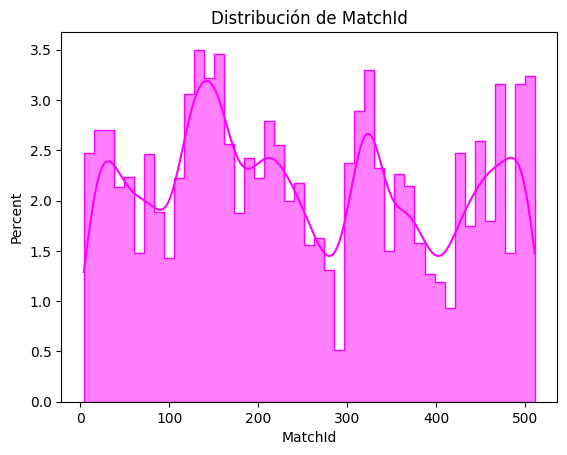

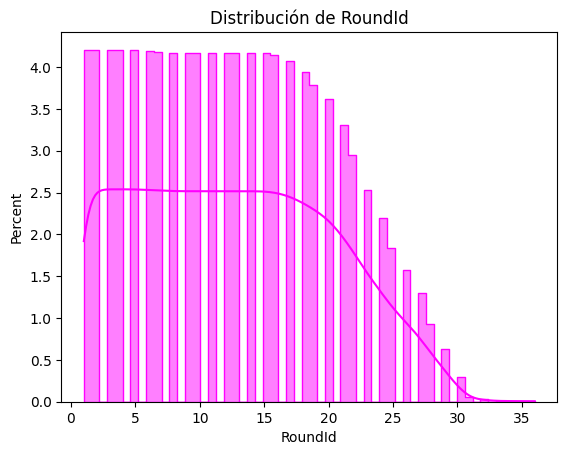

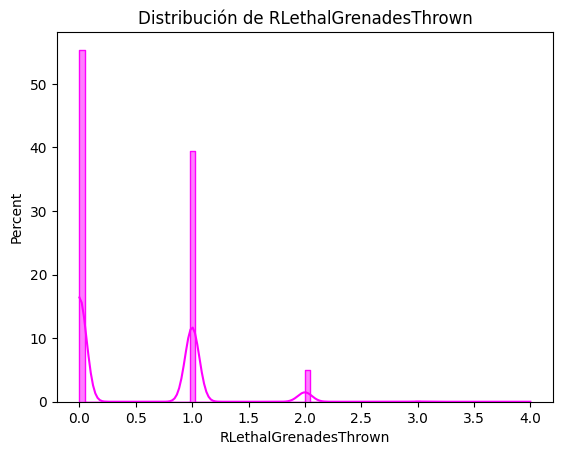

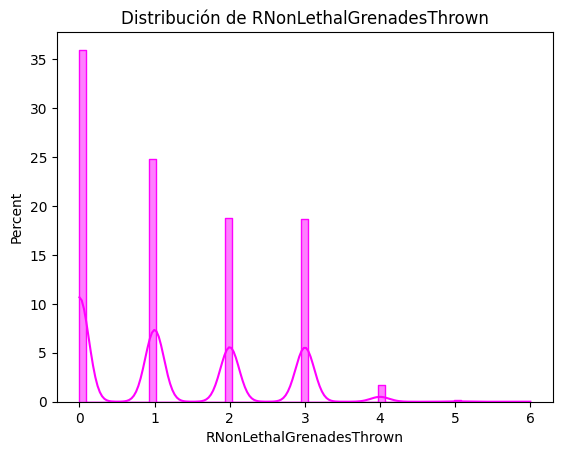

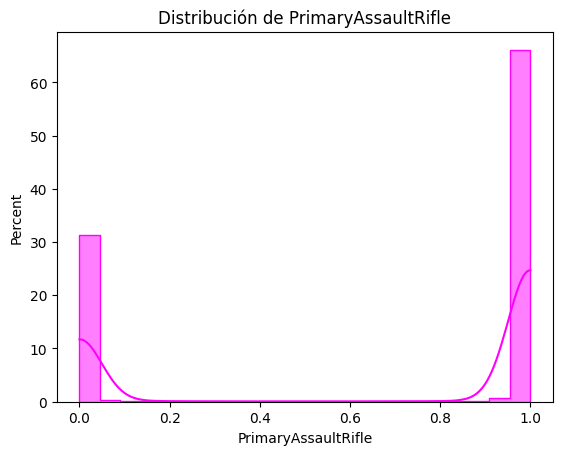

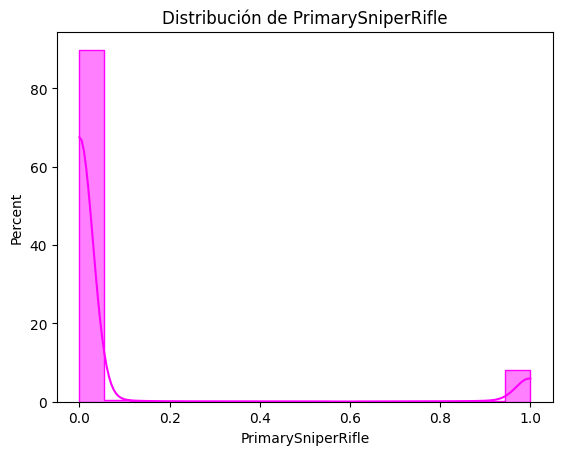

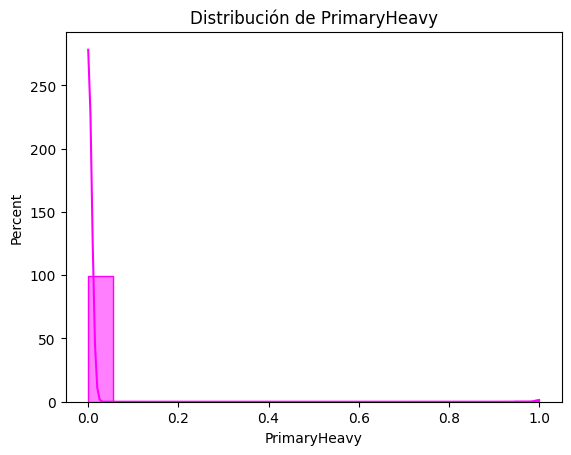

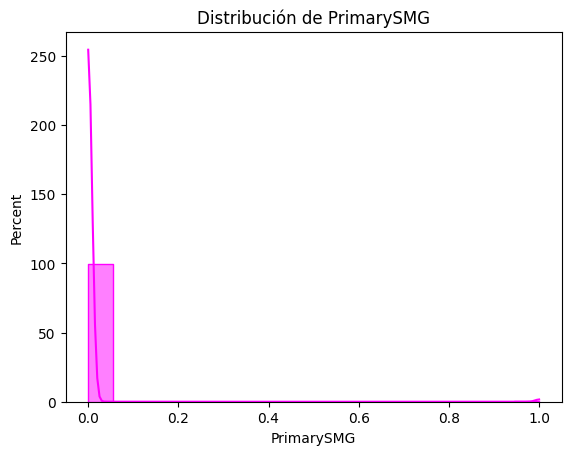

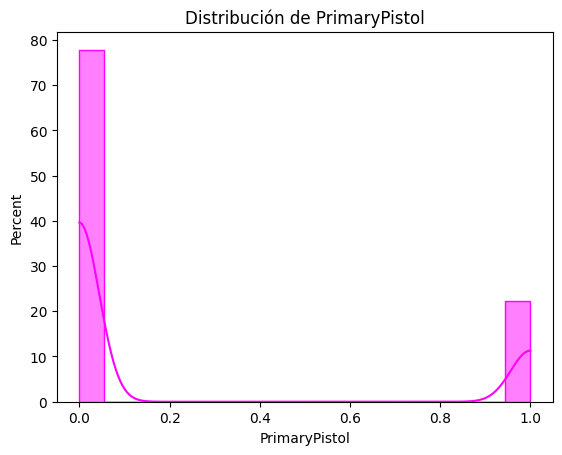

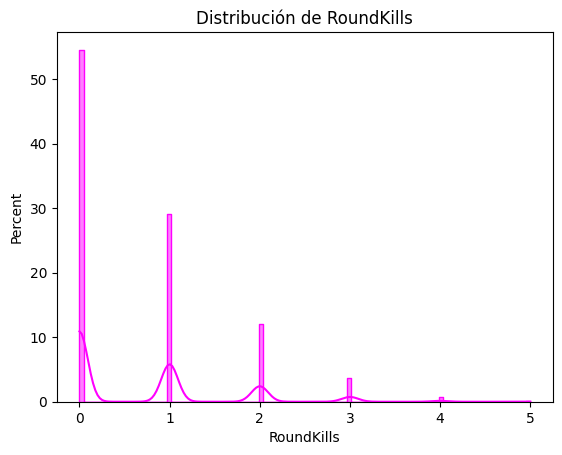

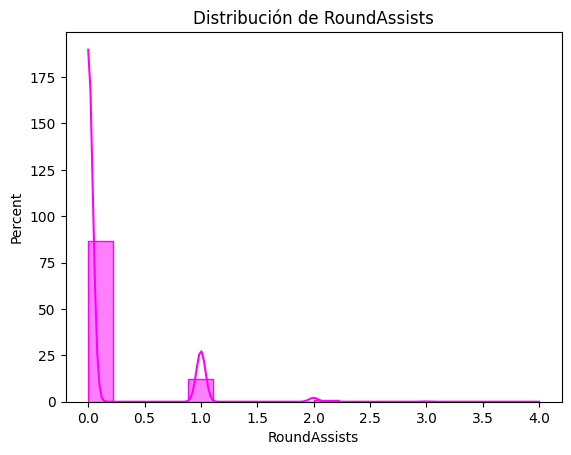

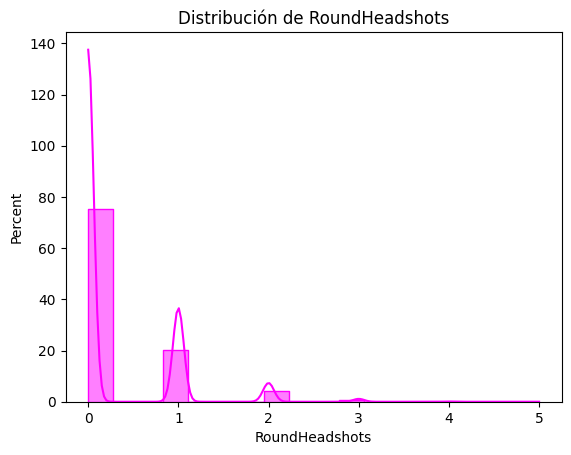

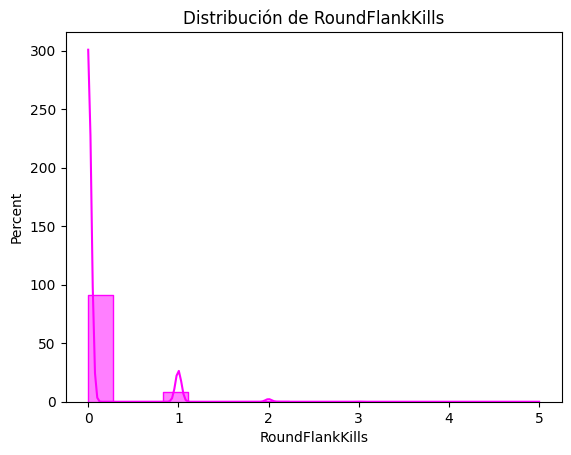

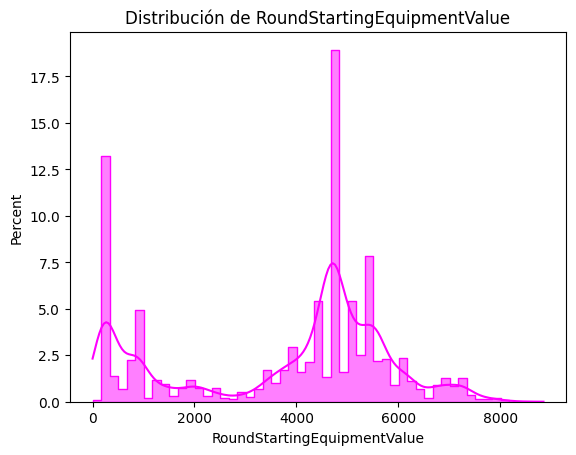

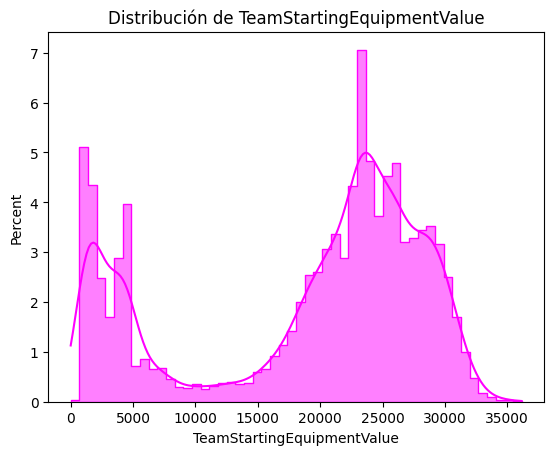

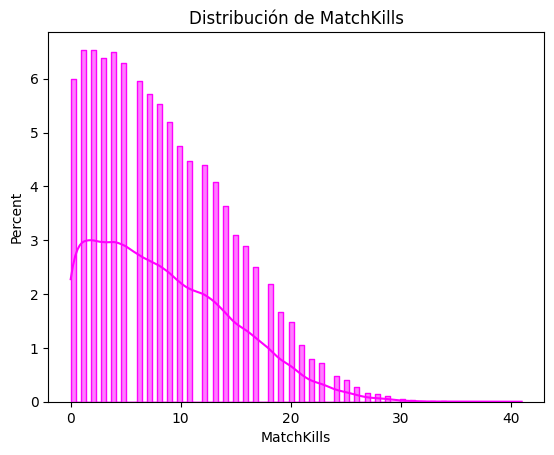

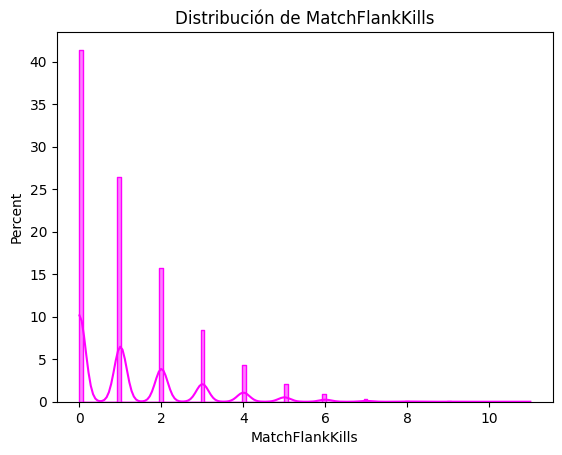

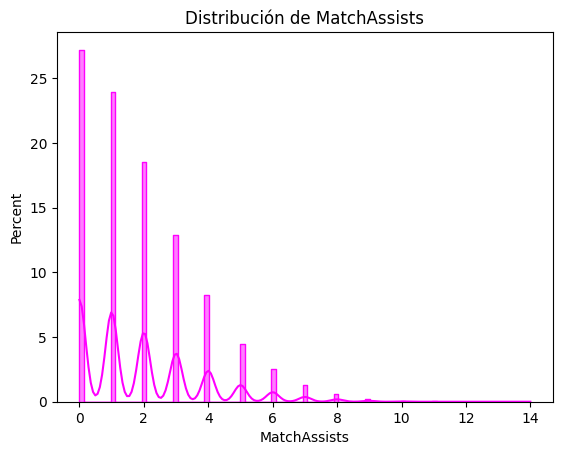

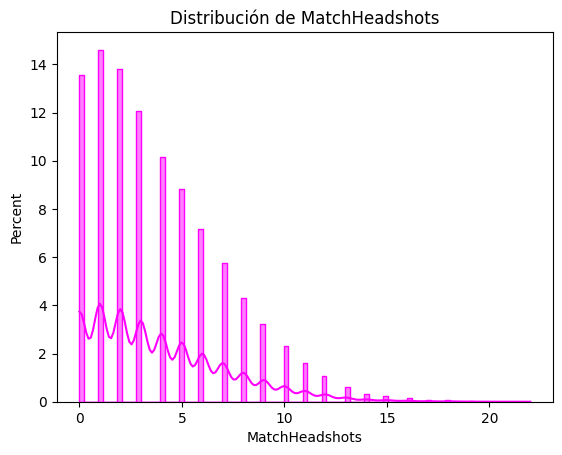

In [ ]:
for i in cs.select_dtypes(include=[np.number]).columns:
    plt.figure()
    sns.histplot(cs[i], kde=True, color='fuchsia', stat='percent', element='step')
    plt.title(f'Distribución de {i}')
    plt.show()

## Matriz de correlacion

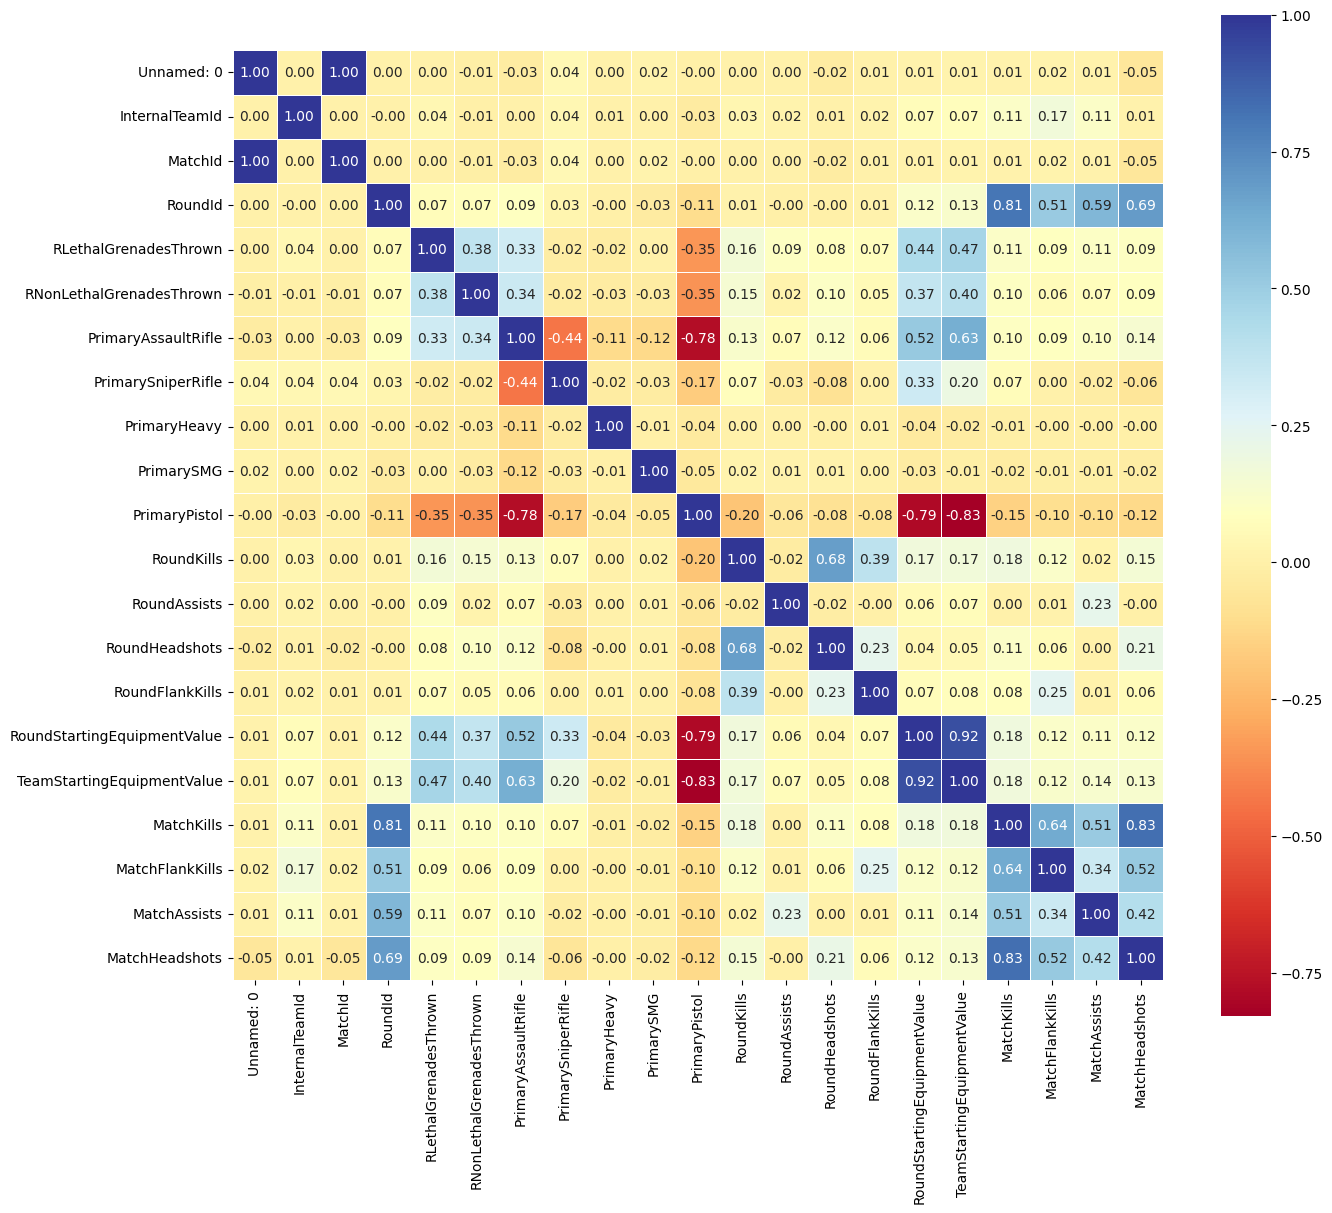

In [ ]:
# Primero seleccionamos los datos a colocar en la matriz de correlacion
# Luego, Creamos la matriz de correlacion
# Le damos un tamaño al grafico de correlacion
# finalmente, creamos el grafico con los siguientes parametros modificables:
# annot: Sirve para ver el valor numerico dentro del cuadrado
# cbar: si queremos ver la barra al costado del grafico
# square: Si queremos que las celdas sean cuadradas
# cmap: elejimos el color del grafico
# fmt: formateo de decimales, en este caso, a 2 decimales
# linewidths: El ancho de separacion de cada celda
x = cs.select_dtypes(include=['int64', 'float64']).columns
correlacion = cs[x]
matriz_correlacion = correlacion.corr()
plt.figure(figsize=(15, 13))
sns.heatmap(matriz_correlacion, annot=True, cbar=True, square=True, cmap='RdYlBu', fmt=".2f", linewidths=0.6)
plt.show()

##Lineas de Regresion

In [ ]:
#Importamos librerias de regresion lineal
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

LINEA 1

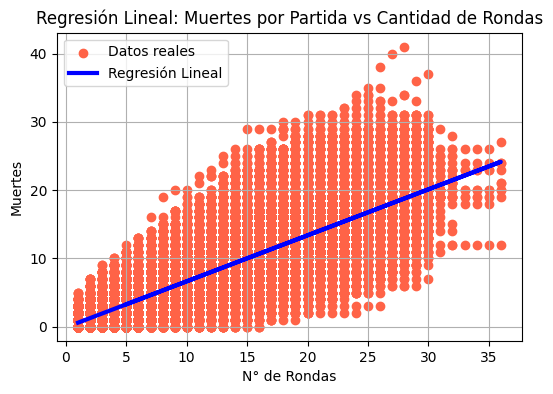

In [ ]:
# Definimos la variable df_clean para limpiar las columnas a utilizar con el metodo .dropna() de los valores nulos
# Las columnas seleccionadas son:'MatchKills', 'RoundId'
df_clean = cs.dropna(subset=['MatchKills', 'RoundId'])

# Hacemos un gráfico de dispersión definiendo los ejes X,Y
X = df_clean['RoundId'].values.reshape(-1, 1)
y = df_clean['MatchKills'].values

# Creamos y ajustamos el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Predecimos los valores de numero de acciones de comando por la liga
y_pred_tmax = modelo.predict(X)

# Visualizamos los datos y la línea de regresión
fig, ax = plt.subplots(figsize=(6, 4))
plt.scatter(X, y, c='tomato', label='Datos reales')
plt.plot(X, y_pred_tmax, color='blue', linewidth=3, label='Regresión Lineal')
plt.xlabel('N° de Rondas')
plt.ylabel('Muertes')
plt.title('Regresión Lineal: Muertes por Partida vs Cantidad de Rondas')
plt.legend()
plt.grid(True)  # Añadimos cuadrícula al gráfico
plt.show()

Con los datos podemos concluir que a mayor cantidad de rondas tenga una partida, mayor sera la cantidad de kills totales que se hagan

LINEA 2

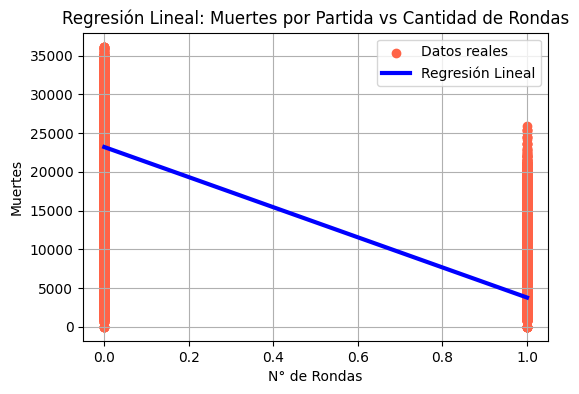

In [ ]:
# Definimos la variable df_clean para limpiar las columnas a utilizar con el metodo .dropna() de los valores nulos
# Las columnas seleccionadas son:'TeamStartingEquipmentValue', 'PrimaryPistol'
df_clean = cs.dropna(subset=['TeamStartingEquipmentValue', 'PrimaryPistol'])

# Hacemos un gráfico de dispersión definiendo los ejes X,Y
X = df_clean['PrimaryPistol'].values.reshape(-1, 1)
y = df_clean['TeamStartingEquipmentValue'].values

# Creamos y ajustamos el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Predecimos los valores de numero de acciones de comando por la liga
y_pred_tmax = modelo.predict(X)

# Visualizamos los datos y la línea de regresión
fig, ax = plt.subplots(figsize=(6, 4))
plt.scatter(X, y, c='tomato', label='Datos reales')
plt.plot(X, y_pred_tmax, color='blue', linewidth=3, label='Regresión Lineal')
plt.xlabel('Pistola Arma Principal')
plt.ylabel('Total del Valor del Equipo')
plt.title('Regresión Lineal: Pistola de Principal vs Valor Total del Equipo')
plt.legend()
plt.grid(True)  # Añadimos cuadrícula al gráfico
plt.show()

El grafico nos muestra como si los jugadores no utilizan la pistola como arma principal y compran otra arma, el dinero total invertido en equipo aumenta
, mientras que si los jugadores ocupan la pistola como arma principal no invierten en armas y el valor total del equipo baja.

Con este grafico se puede ver que tan bien se relacionan los datos entre si, esto nos permite elejir mejor que datos vamos a usar y relacionar entre si

# Fase 3: Data Preparation

## Seleccion de columnas

Ahora se cargaran en un nuevo df las columnas sobre las cuales se realizara la limpieza, para trabajar los modelos en fases posteriores

In [ ]:
# Seleccion de columnas
col = ["Map","Team","InternalTeamId","MatchId",'RoundId','RoundWinner', 'MatchWinner','RoundKills',
       'RoundHeadshots','MatchKills','MatchHeadshots','RoundStartingEquipmentValue', 'TeamStartingEquipmentValue']
# Copia del df en uno nuevo
cs1 = cs[col].copy()
# Mostramos el df copia
cs1.head()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,RoundKills,RoundHeadshots,MatchKills,MatchHeadshots,RoundStartingEquipmentValue,TeamStartingEquipmentValue
0,de_inferno,Terrorist,1,4,1,False,True,0,0,0,0,750,4400
1,de_inferno,Terrorist,1,4,1,False,True,0,0,0,0,800,4400
2,de_inferno,Terrorist,1,4,1,False,True,0,0,0,0,1000,4400
3,de_inferno,Terrorist,1,4,1,False,True,0,0,0,0,850,4400
4,de_inferno,Terrorist,1,4,1,False,True,0,0,0,0,1000,4400


## Eliminar valores nulos

Ahora se procedera a modificar los valores nulos, ya que hay muy pocos, estos valores nulos se pueden rellenar por la moda, media, mediana y no va a haber un gran cambio

In [ ]:
cs1.Team.value_counts()

Team
Terrorist           39591
CounterTerrorist    39564
Name: count, dtype: int64

In [ ]:
# Reemplazamos el valor faltante por CounterTerrorist
a = 'CounterTerrorist'
cs1['Team'] = cs['Team'].fillna(a)

In [ ]:
cs1.MatchWinner.value_counts()

MatchWinner
False    42017
True     37139
Name: count, dtype: int64

In [ ]:
# Rellenamos los valores faltantes con True
b = 'True'
cs1['MatchWinner'] = cs1['MatchWinner'].fillna(b)

In [ ]:
cs1.RoundWinner.value_counts()

RoundWinner
False     23195
True      23194
False     16393
True      16374
False4        1
Name: count, dtype: int64

In [ ]:
# Comprobamos los tipos de datos que tiene la columna
cs1.RoundWinner.unique()

array(['False', 'True', 'False4', True, False], dtype=object)

In [ ]:
# Reemplazamos los valores tipo string 'True' por el boolean True
cs1.loc[cs1["RoundWinner"] == 'True',"RoundWinner"] = True
# Reemplazamos los valores tipo string 'False' y 'False4' por el boolean False
cs1.loc[cs1["RoundWinner"] == 'False',"RoundWinner"] = False
cs1.loc[cs1["RoundWinner"] == 'False4',"RoundWinner"] = False

In [ ]:
# Comprobamos los cambios
cs1.RoundWinner.value_counts()

RoundWinner
False    39589
True     39568
Name: count, dtype: int64

In [ ]:
# Ahora hacemos lo mismo con los valores de la columna MatchWinner
cs1.loc[cs1["MatchWinner"] == 'True',"MatchWinner"] = True

## Verificamos si los valores nulos dejaron de existir

In [ ]:
cs1.isna().sum()

Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
RoundKills                     0
RoundHeadshots                 0
MatchKills                     0
MatchHeadshots                 0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
dtype: int64

Podemos ver que nos encargamos de los valores nulos de forma exitosa

## Transformar valores string a numericos

Esto se hace para que la maquina entienda el valor, nosotros entendemos el valor string pero la maquina no lo va a reconocer como nosotros queremos, entonces se hara una transformacion a los datos string

In [ ]:
# Primero con la columna MatchWinner
cs1.MatchWinner.replace({True: 1, False: 0}, inplace=True)

In [ ]:
# Verificamos si se hizo con exito el cambio
cs1.MatchWinner.value_counts()

MatchWinner
0    42017
1    37140
Name: count, dtype: int64

In [ ]:
cs1['MatchWinner'] = cs1['MatchWinner'].astype(bool)

In [ ]:
# Ahora con la columna RoundWinner
cs1.RoundWinner.replace({True: 1, False: 0}, inplace=True)

In [ ]:
# Verificamos si se hizo con exito el cambio
cs1.RoundWinner.value_counts()

RoundWinner
0    39589
1    39568
Name: count, dtype: int64

In [ ]:
# Ahora con la columna Team
cs1.Team.replace({"CounterTerrorist": 1, "Terrorist": 0}, inplace=True)

In [ ]:
# Verificamos si se hizo con exito el cambio
cs1.Team.value_counts()

Team
0    39591
1    39566
Name: count, dtype: int64

In [ ]:
# Finalmente con la columna Map
cs1.Map.replace({"de_inferno": 0, "de_dust2": 1, "de_mirage": 2, "de_nuke": 3}, inplace=True)

In [ ]:
# Verificamos si se hizo con exito el cambio
cs1.Map.value_counts()

Map
0    28869
1    19120
2    19019
3    12149
Name: count, dtype: int64

## Eliminar valores atipicos

Como vimos anteriormente, existe una buena cantidad de valores atipicos, estos valores se pueden eliminar o cambiar, en este caso, al no ser una gran cantidad de valores atipicos, podemos eliminarlos y asi tener un modelo mas exacto y ordenado

In [ ]:
# Seleccionamos las columnas que se van a analizar para los valores atipicos
columnas_a_limpiar = ["RoundKills","RoundHeadshots","MatchKills","MatchHeadshots","RoundStartingEquipmentValue","TeamStartingEquipmentValue"]
# Creamos un contador de valores atipicos (outliers)
outliers_count = {}
# Iterar sobre las columnas que se van a limpiar
for columna in columnas_a_limpiar:
    mean = cs1[columna].mean()
    std_dev = cs1[columna].std()

    # Se definen los criterios de corte (dependiendo de los datos y la cantidad que se manejen, se elije un valor a multiplicar, si se van a eliminar o cambiar los)
    lower_bound = mean - 4 * std_dev
    upper_bound = mean + 4 * std_dev

    # Contar los valores atípicos en la columna actual
    outliers = cs1[(cs1[columna] < lower_bound) | (cs1[columna] > upper_bound)][columna]
    outliers_count[columna] = len(outliers)

# Mostrar los resultados
print('Cantidad de valores atípicos en cada columna:')
for columna, count in outliers_count.items():
    print(f'Columna {columna}: {count} valores atípicos')

Cantidad de valores atípicos en cada columna:
Columna RoundKills: 67 valores atípicos
Columna RoundHeadshots: 530 valores atípicos
Columna MatchKills: 12 valores atípicos
Columna MatchHeadshots: 142 valores atípicos
Columna RoundStartingEquipmentValue: 0 valores atípicos
Columna TeamStartingEquipmentValue: 0 valores atípicos


In [ ]:
# Crear copia de seguridad en caso de emergencia
copia_cs = cs1.copy()

# Columnas que se van a limpiar
columnas_a_limpiar = ["RoundKills","RoundHeadshots","MatchKills","MatchHeadshots","RoundStartingEquipmentValue","TeamStartingEquipmentValue"]

# Contador de outliers (Valores atipicos)
outliers_count = {}

# Iterar sobre las columnas que se van a limpiar
for columna in columnas_a_limpiar:
    mean = copia_cs[columna].mean()
    std_dev = copia_cs[columna].std()

    # Definir los criterios de corte (+-3 std)
    lower_bound = mean - 4 * std_dev
    upper_bound = mean + 4 * std_dev

    # Identificar los valores atípicos en la columna actual
    outliers = copia_cs[(copia_cs[columna] < lower_bound) | (copia_cs[columna] > upper_bound)]

    # Contar y mostrar los valores atípicos
    outliers_count[columna] = len(outliers)
    print(f'Columna {columna}: {len(outliers)} valores atípicos van a ser eliminados.')

    # Tratar los valores atípicos (por ejemplo, eliminarlos)
    copia_cs = copia_cs.drop(outliers.index)

# Guardar el DataFrame limpio en un nuevo archivo
copia_cs.to_csv('/content/cs_Limpio.csv', index=False)  # Reemplaza la ruta actual con la ruta donde deseas guardar el archivo limpio

# Mostrar el conteo total de valores atípicos eliminados
print("\nTotal de valores atípicos eliminados por columna:")
for columna, count in outliers_count.items():
    print(f'{columna}: {count}')

Columna RoundKills: 67 valores atípicos van a ser eliminados.
Columna RoundHeadshots: 501 valores atípicos van a ser eliminados.
Columna MatchKills: 12 valores atípicos van a ser eliminados.
Columna MatchHeadshots: 128 valores atípicos van a ser eliminados.
Columna RoundStartingEquipmentValue: 0 valores atípicos van a ser eliminados.
Columna TeamStartingEquipmentValue: 0 valores atípicos van a ser eliminados.

Total de valores atípicos eliminados por columna:
RoundKills: 67
RoundHeadshots: 501
MatchKills: 12
MatchHeadshots: 128
RoundStartingEquipmentValue: 0
TeamStartingEquipmentValue: 0


# Fase 4: Modeling

En esta fase haremos uso de los datos limpiados en la fase anterior para la cracion de nuestros modelos de prediccion, para eso el primer paso sera cargar os datos limpios y realizar algunos cambios de tipo que se perdieron al momento de exportar los datos

In [ ]:
df = pd.read_csv("/content/cs_Limpio.csv", sep=',')
df.head()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,RoundKills,RoundHeadshots,MatchKills,MatchHeadshots,RoundStartingEquipmentValue,TeamStartingEquipmentValue
0,0,0,1,4,1,0,True,0,0,0,0,750,4400
1,0,0,1,4,1,0,True,0,0,0,0,800,4400
2,0,0,1,4,1,0,True,0,0,0,0,1000,4400
3,0,0,1,4,1,0,True,0,0,0,0,850,4400
4,0,0,1,4,1,0,True,0,0,0,0,1000,4400


In [ ]:
df['MatchHeadshots'] = df['MatchHeadshots'].astype(float)

## Normalizacion de los datos con la columna MatchHeadshots y modelos

Para tener un mejor resultado al momento de hacer nuestros modelos, primero normalizaremos los datos

In [ ]:
y=df.MatchHeadshots.values
x_df=df.drop(['MatchHeadshots'],axis=1)
#Normalización
x=(x_df-np.min(x_df))/(np.max(x_df)-np.min(x_df))

Separamos los datos en los grupos de datos de entrenamiento y datos de testeo

In [ ]:
# Ahora procedemos a separar los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

### Modelo Linea de regresion con la columna MatchHeadshots

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("R^2 de la Linea de Regresion con los datos de entrenamiento: {:.2%}".format(linreg.score(X_train, y_train)))
print("R^2 de la linea de regresion con los datos de prueba: {:.2%}".format(linreg.score(X_test, y_test)))

R^2 de la Linea de Regresion con los datos de entrenamiento: 72.62%
R^2 de la linea de regresion con los datos de prueba: 72.60%


* Podemos ver que los datos de prueba y entrenamiento dan casi el mismo resultado, lo cual significa que nuestro modelo no se esta sobre ajustando y generaliza bien los datos nuevos.
* Ademas, gracias a las tablas que elegimos para hacer el modelo de regresion, el 72.60% de los datos de variabilidad de los headshots por ronda se pueden explicar gracias a las columnas que dejamos para ello, lo cual es bueno

<Axes: >

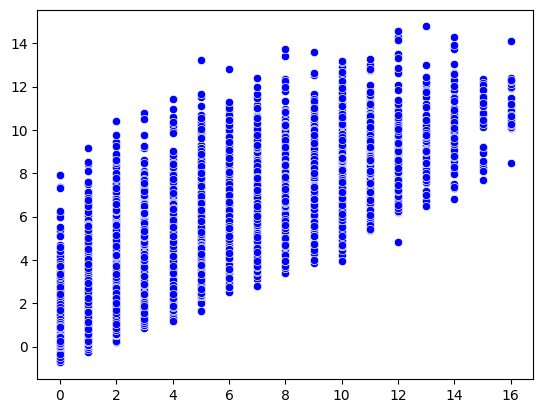

In [ ]:
y_pred = linreg.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred, color="blue")

### Modelo arbol de decisión con la columna MatchHeadshots

In [ ]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
print("R^2 del arbol de decision con los datos de entrenamiento: {:.2%}".format(tree.score(X_train, y_train)))
print("R^2 del arbol de decision con los datos de prueba: {:.2%}".format(tree.score(X_test, y_test)))

R^2 del arbol de decision con los datos de entrenamiento: 99.74%
R^2 del arbol de decision con los datos de prueba: 58.85%


* En este caso podemos ver que los datos de entrenamiento dan un 99.74% en la R^2, lo cual es malo, debido a que los datos de prueba dan un 58.85%, lo cual  esta alejado del 99.74%, entonces el modelo se sobreajusta, haciendo que no se  generalizen bien los nuevos datos
* Ademas, el 58.85% de los datos de variabilidad en los headshots por ronda se pueden explicar gracias a las columnas que dejamos para ello, lo cual no es muy bueno por lo que se menciono anteriormente

<Axes: >

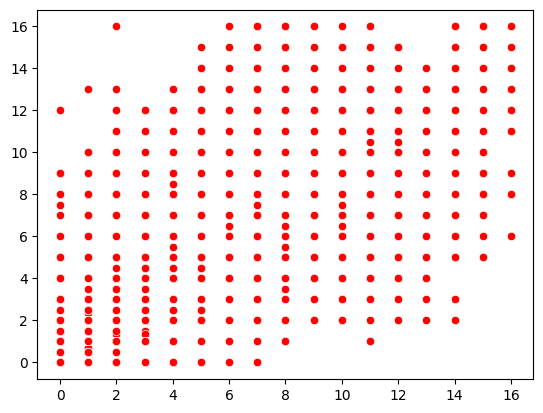

In [ ]:
y_pred1 = tree.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred1, color="red")

### Modelo bosque random de arboles de decisión con la columna MatchHeadshots

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
print("R^2 del modelo de regresion de bosque aleatorio en datos de entrenamiento: {:.2%}".format(rf.score(X_train, y_train)))
print("R^2 del modelo de regresion de bosque aleatorio en datos de prueba: {:.2%}".format(rf.score(X_test, y_test)))

R^2 del modelo de regresion de bosque aleatorio en datos de entrenamiento: 96.74%
R^2 del modelo de regresion de bosque aleatorio en datos de prueba: 78.37%


* En este caso podemos ver que los datos de entrenamiento estan cerca del 100%, dando un 96.74% en la R^2, lo cual no es malo pero puede ser mejor debido a que nuestros datos de prueba dan un 78.37% en el R^2 entonces el modelo se sobreajusta un poco, haciendo que los datos no se generalizen tan bien
* Las tablas que elegimos para hacer el modelo de bosque aleatorio, el 78.37% de los datos de variabilidad en los headshots por partida se pueden explicar gracias a las columnas que dejamos para ello, lo cual es bueno pero puede ser mejor

<Axes: >

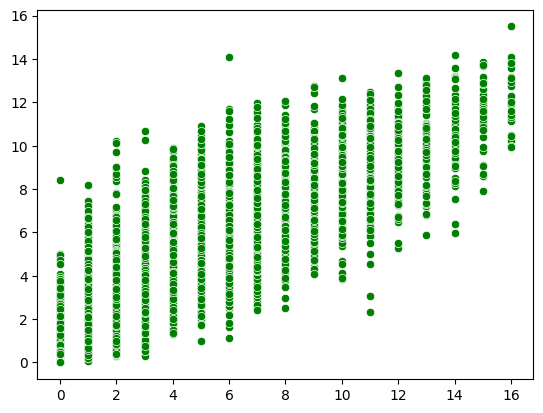

In [ ]:
y_pred2 = rf.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred2, color="green")

## Normalizacion de los datos con la columna MatchWinner y modelos

Al igual que lo hicimos anteriormente, normalizaremos los datos para tener una mejor resultado en nuestros modelos y que no interfiera la unidad en la que se encuentra

In [ ]:
a=df.MatchWinner.values
b_df=df.drop(['MatchWinner'],axis=1)
#Normalización
b=(b_df-np.min(x_df))/(np.max(x_df)-np.min(x_df))

Hacemos una nueva separacion de datos en los grupos de datos de entrenamiento y datos de testeo

In [ ]:
# Ahora procedemos a separar los datos de entrenamiento y prueba
B_train, B_test, a_train, a_test = train_test_split(b, a, test_size=0.20, random_state=42)

### Modelo KNN

In [ ]:
# Lista de valores que se ingresaran a n_neighbors para probar cual da un mejor resultado
n_neighbors_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

# Guardar los resultados en una lista para luego comparar los resultados
cv_scores = []

for k in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, B_train, a_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f'numero ingresado a n_neighbors = {k}, Precisión: {scores.mean():.4f}')

# Revisar cual dio mejor resultado
best_k = n_neighbors_values[np.argmax(cv_scores)]
print(f'Mejor valor de n_neighbors: {best_k}')

# Se entrena el modelo con el mejor resultado obtenido anteriormente
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(B_train, a_train)
print('Precisión del modelo con n_neighbors mas óptimo: {:.2f}' .format(knn_best.score(B_test, a_test)))

# Generamos una matriz de confusion para despues comparar los resultados de los distintos modelos
y_pred = knn_best.predict(B_test)
y_pred_knn = y_pred
y_true = a_test

cm_knn = confusion_matrix(y_true, y_pred)
print('Matriz de confusión:')
print(cm_knn)

numero ingresado a n_neighbors = 1, Precisión: 0.7111
numero ingresado a n_neighbors = 3, Precisión: 0.6536
numero ingresado a n_neighbors = 5, Precisión: 0.6354
numero ingresado a n_neighbors = 7, Precisión: 0.6254
numero ingresado a n_neighbors = 9, Precisión: 0.6203
numero ingresado a n_neighbors = 11, Precisión: 0.6165
numero ingresado a n_neighbors = 13, Precisión: 0.6137
numero ingresado a n_neighbors = 15, Precisión: 0.6125
numero ingresado a n_neighbors = 17, Precisión: 0.6104
numero ingresado a n_neighbors = 19, Precisión: 0.6074
Mejor valor de n_neighbors: 1
Precisión del modelo con n_neighbors mas óptimo: 0.73
Matriz de confusión:
[[6167 2177]
 [2066 5280]]


Visualizamos la precision segun los datos ingresados

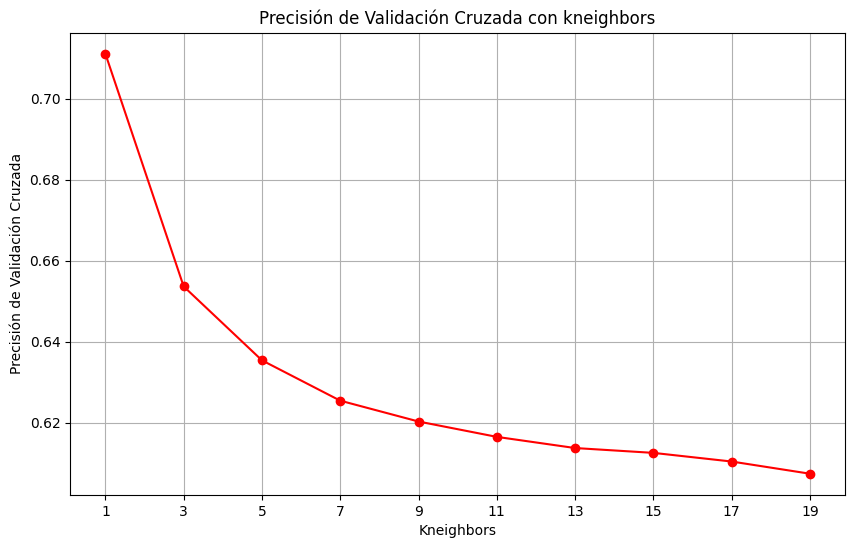

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, cv_scores, marker='o', linestyle='-', color='r')
plt.xlabel('Kneighbors')
plt.ylabel('Precisión de Validación Cruzada')
plt.title('Precisión de Validación Cruzada con kneighbors')
plt.xticks(n_neighbors_values)
plt.grid(True)
plt.show()

### Modelo de regresion logistica

In [ ]:
lr=LogisticRegression()
lr.fit(B_train,a_train)
print('lr accuracy :', lr.score(B_test,a_test))

# confusion matrix
y_pred = lr.predict(B_test)
y_pred_lr = y_pred
y_true = a_test

cm_lr = confusion_matrix(y_true,y_pred)
print('Matriz de confusión:')
print(cm_lr)

lr accuracy : 0.5930528999362651
Matriz de confusión:
[[6598 1746]
 [4639 2707]]


### Modelo SVM

In [ ]:
svm=SVC(random_state=1)
svm.fit(B_train,a_train)
print('svm accuracy :', svm.score(B_test,a_test))

# confisuon matrix
y_pred = svm.predict(B_test)
y_pred_svm = y_pred
y_true = a_test

cm_svm = confusion_matrix(y_true,y_pred)

svm accuracy : 0.5927979604843849


### Modelo de naive bayes

In [ ]:
nb=GaussianNB()
nb.fit(B_train,a_train)
print('nb accuracy : ', nb.score(B_test,a_test))

# confisuon matrix
y_pred = nb.predict(B_test)
y_pred_nb = y_pred
y_true = a_test

cm_nb = confusion_matrix(y_true,y_pred)

nb accuracy :  0.6231357552581261


### Modelo arbol de decisión de clasificacion

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(B_train,a_train)
print('dt.accuracy : ', nb.score(B_test,a_test))

# confisuon matrix
y_pred = dt.predict(B_test)
y_pred_dt = y_pred
y_true = a_test

cm_dt = confusion_matrix(y_true,y_pred)

dt.accuracy :  0.6231357552581261


### Matriz de confusion de los modelos

Una vez hechos los modelos, procedemos a comprarr sus resultados de cada una en la matriz de confusion

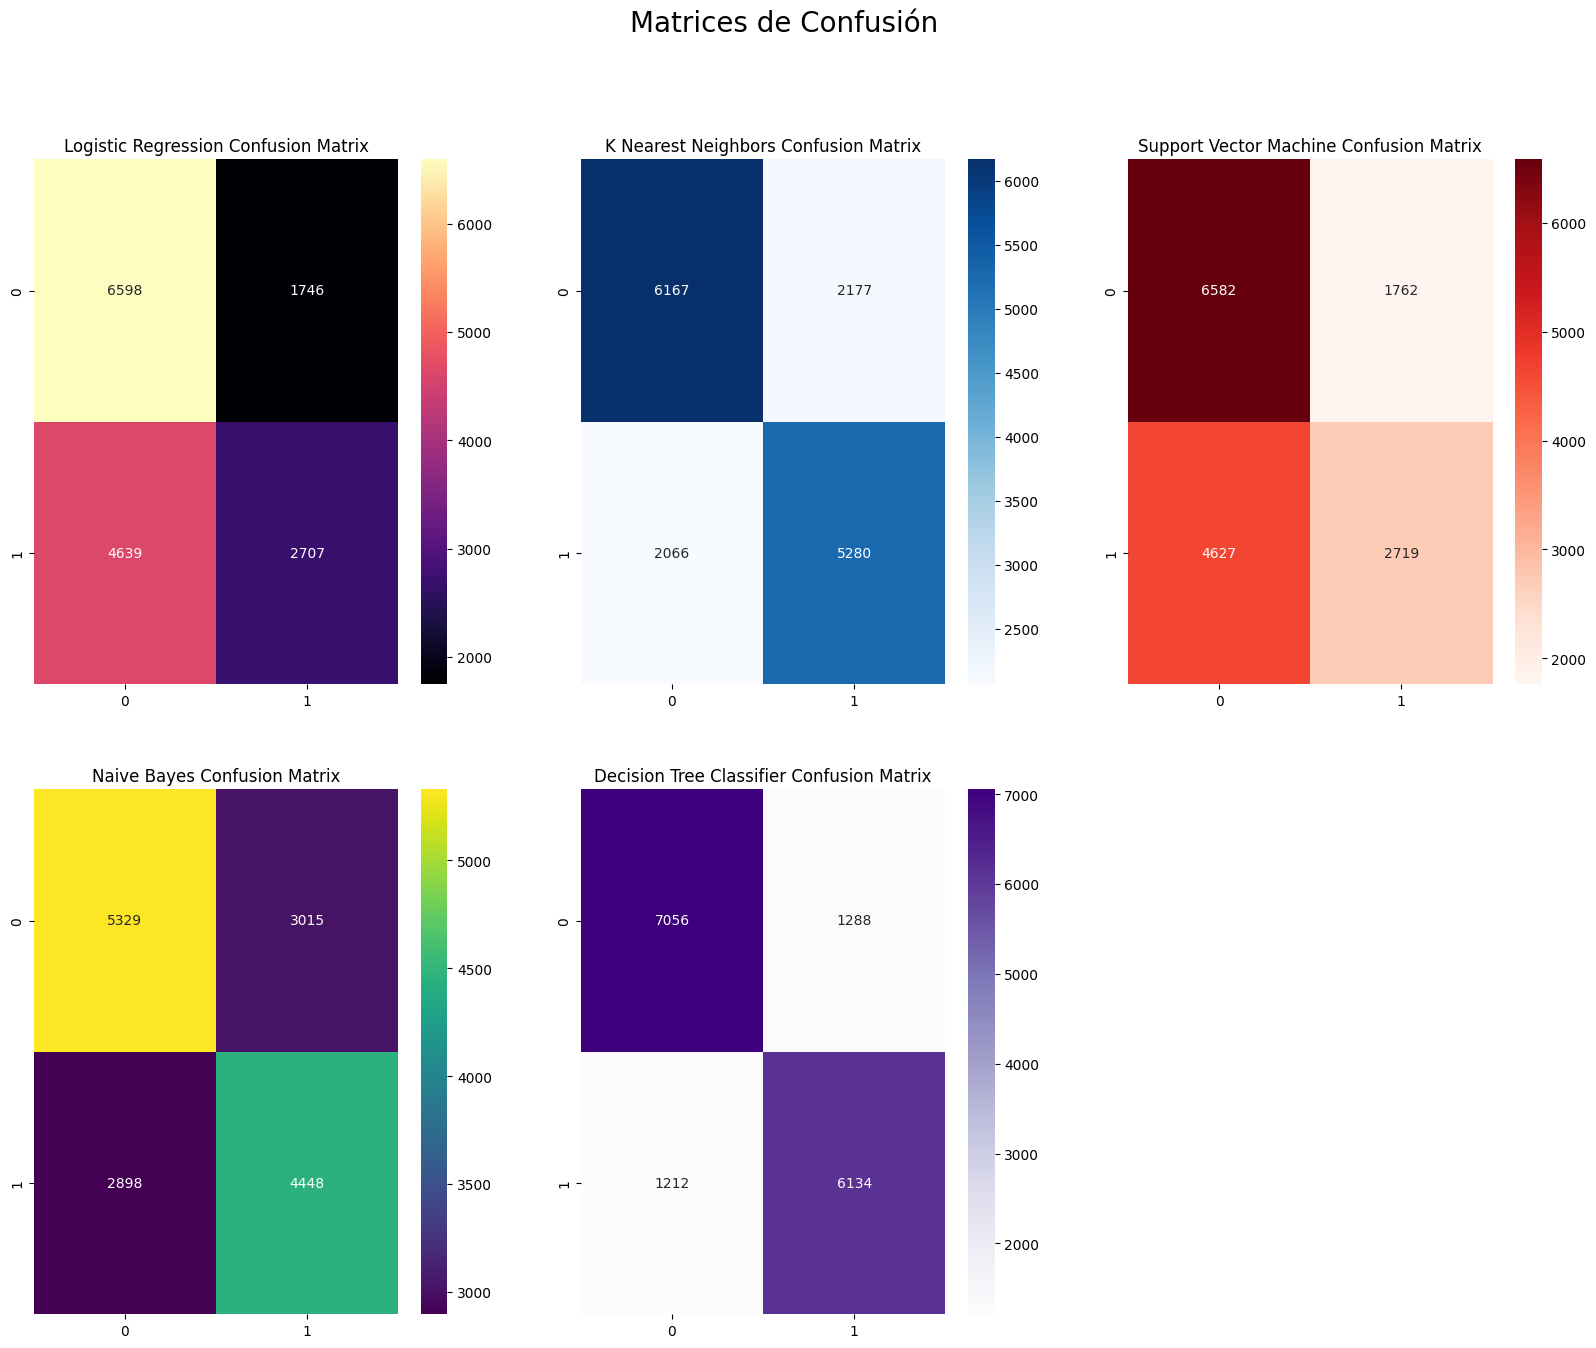

In [ ]:
plt.figure(figsize=(20,15))

plt.suptitle("Matrices de Confusión",fontsize=20)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=True,annot=True,cmap="magma",fmt="d")

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,cbar=True,annot=True,cmap="Blues",fmt="d")

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,cbar=True,annot=True,cmap="Reds",fmt="d")

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,cbar=True,annot=True,cmap="viridis",fmt="d")

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,cbar=True,annot=True,cmap="Purples",fmt="d")

plt.show()

# Fase 5: Evaluation

Durante esta fase de evaluacion, obtendremos diferentes metricas de evaluacion de los modelos creados en la fase anterior, para poder elegir de manera informada el modelo que mejor se adapte a los datos y asi obtener predicciones mas precisas.

## Columna MatchHeadshots

Para la evaluacion de los modelos crearemos tablas comparativas entre los valores reales, los valores de la prediccion y la diferencia que hubo entre ellas, ademas de obtener algunas metricas que nos ayudaran a hacer una comparacion mas objetiva.

### Evaluando el modelo de regresion lineal

In [ ]:
# Evaluando el Modelo de Regresión Lineal
#
d = {"Verdadero": y_test, "Predicción": y_pred}
df_lr = pd.DataFrame(data=d)
df_lr["Diferencia"] = df_lr["Predicción"]-df_lr["Verdadero"]
df_lr

,Verdadero,Predicción,Diferencia
0,6,13,7
1,3,2,-1
2,7,6,-1
3,6,5,-1
4,1,1,0
...,...,...,...
15685,3,3,-0
15686,9,6,-3
15687,0,0,0
15688,0,0,0


In [ ]:
print("La media absoluta de error del modelo de linea de regresion es de {:.2f}".format(mean_absolute_error(y_test, y_pred)))

La media absoluta de error del modelo de linea de regresion es de 1.20


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("El error cuadratico medio del modelo de linea de regresion es de: {:.2f}".format(mse))

El error cuadratico medio del modelo de linea de regresion es de: 2.79


### Evaluando el modelo de arbol de decisión

In [ ]:
# Evaluando el Modelo de Árbol de Decisión de regresión
#
d = {"Verdadero": y_test, "Predicción": y_pred1}
df_dt = pd.DataFrame(data=d)
df_dt["Diferencia"] = df_dt["Predicción"]-df_dt["Verdadero"]
df_dt

,Verdadero,Predicción,Diferencia
0,6,5,-1
1,3,1,-2
2,7,6,-1
3,6,6,0
4,1,1,0
...,...,...,...
15685,3,3,0
15686,9,5,-4
15687,0,0,0
15688,0,0,0


In [ ]:
print("La media de error del modelo de arbol de decision es de {:.2f}".format(mean_absolute_error(y_test,y_pred1)))

La media de error del modelo de arbol de decision es de 1.28


In [ ]:
print("El error logarítmico cuadrático medio del modelo de arbol de decisión es de {:.2%}".format(mean_squared_log_error(y_test,y_pred1)))

El error logarítmico cuadrático medio del modelo de arbol de decisión es de 19.01%


In [ ]:
mse1 = mean_squared_error(y_test, y_pred1)
print("El error cuadratico medio del modelo de arbol de decisión es de: {:.2f}".format(mse1))

El error cuadratico medio del modelo de arbol de decisión es de: 4.19


### Evaluando el modelo de bosque aleatorio de arboles de decisión

In [ ]:
# # Evaluando el Modelo de Bosque Aleatorio de árboles de decisión
#
d = {"Verdadero": y_test, "Predicción": y_pred2}
df_rf = pd.DataFrame(data=d)
df_rf["Diferencia"] = df_rf["Predicción"]-df_rf["Verdadero"]
df_rf

,Verdadero,Predicción,Diferencia
0,6,7,1
1,3,3,-0
2,7,7,-0
3,6,6,0
4,1,1,0
...,...,...,...
15685,3,3,0
15686,9,6,-3
15687,0,0,0
15688,0,0,0


In [ ]:
print("La media de error del modelo de bosque aleatorio de arbol de decision es de {:.2f}".format(mean_absolute_error(y_test,y_pred2)))

La media de error del modelo de bosque aleatorio de arbol de decision es de 1.03


In [ ]:
print("El error logarítmico cuadrático medio del bosque aleatorio de arboles de decisión es de {:.2%}".format(mean_squared_log_error(y_test,y_pred2)))

El error logarítmico cuadrático medio del bosque aleatorio de arboles de decisión es de 10.67%


In [ ]:
mse2 = mean_squared_error(y_test, y_pred2)
print("El error cuadratico medio del modelo bosque random de arbol de decision es de : {:.2f}".format(mse2))

El error cuadratico medio del modelo bosque random de arbol de decision es de : 2.20


Según la evaluacion realizada, obtenemos que el modelo que mejor se ajusta a los datos reales es el modelo de regresion lineal.

## Columna MatchWinner

Para la evaluacion de los modelos de clasificacion, al igual que los anteriores, obtendremos algunas metricas y asi hacer una comparacion objetiva de los modelos

In [ ]:
from sklearn.metrics import classification_report

# Obtén el informe de métricas para cada modelo
report_lr = classification_report(y_true, y_pred_lr)
report_knn = classification_report(y_true, y_pred_knn)
report_svm = classification_report(y_true, y_pred_svm)
report_nb = classification_report(y_true, y_pred_nb)
report_dt = classification_report(y_true, y_pred_dt)

# Imprime los informes de métricas
print("Logistic Regression Classification Report:")
print(report_lr)

print("\nK Nearest Neighbors Classification Report:")
print(report_knn)

print("\nSupport Vector Machine Classification Report:")
print(report_svm)

print("\nNaive Bayes Classification Report:")
print(report_nb)

print("\nDecision Tree Classifier Classification Report:")
print(report_dt)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.59      0.79      0.67      8344
        True       0.61      0.37      0.46      7346

    accuracy                           0.59     15690
   macro avg       0.60      0.58      0.57     15690
weighted avg       0.60      0.59      0.57     15690


K Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.74      0.74      8344
        True       0.71      0.72      0.71      7346

    accuracy                           0.73     15690
   macro avg       0.73      0.73      0.73     15690
weighted avg       0.73      0.73      0.73     15690


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

       False       0.59      0.79      0.67      8344
        True       0.61      0.37      0.46      7346

    accuracy                           0.59     

Podemos ver que el modelo que da una mejor precision en los datos es el arbol de decision de clasificacion, dando en general una precision del 84%, ademas de ser el mejor identificando los verdaderos positivos por lo sera el modelo que se usara como modelo predictivo

# Fase 6: Deployment

En esa etapa se implementaran los modelos escogidos durante la fase de evaluacion, al simualar algunos datos de entrada para obtener una prediccion en base a estos.

## Columna MatchHeadshots

In [ ]:
#**
# Selección del Modelo : se puede eligir el modelo linea de regresion como el mejor modelo entre los tres,
# en función de sus puntajes MAE y MSLE en la prueba
#
model = linreg
model

LinearRegression()

In [ ]:
x_df.head()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,RoundKills,RoundHeadshots,MatchKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue
0,0,0,1,4,1,0,True,0,0,0,750,4400
1,0,0,1,4,1,0,True,0,0,0,800,4400
2,0,0,1,4,1,0,True,0,0,0,1000,4400
3,0,0,1,4,1,0,True,0,0,0,850,4400
4,0,0,1,4,1,0,True,0,0,0,1000,4400


Los valores a rellenar en orden serian los siguientes:

* Map, Team, InternalTeamId, MatchId, RoundId, RoundWinner, MatchWinner, RoundKills, RoundHeadshots, MatchKills, RoundStartingEquipmentValue y TeamStartingEquipmentValue

In [ ]:
headshots = [0, 0, 1, 4, 1, 1, True, 0, 1, 3, 750, 4400]

In [ ]:
# Podemos tomar estos nuevos datos y usarlos para predecir los headshots por partida
#
prediction = model.predict([headshots])[0]
print("Headshots de la ronda :", prediction)

Headshots de la ronda : 69576.33045468607


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Ahora procederemos a importar el modelo con la libreria pickle, se hace esto para no tener que entrenar el modelo cada ves que lo queramos usar

In [ ]:
# Primero importamos la libreria de pickle
import pickle

In [ ]:
# Primero, abramos un nuevo archivo para nuestro almacenar nuestro modelo y poder llamarlo
a = open('Headshots_por_partida', 'wb')

In [ ]:
# Así, salvamos en este archivo nuestro modelo de linea de regresion
pickle.dump(model , a)

In [ ]:
# Y cerramos el archivo
a.close()

Y ya tendriamos listo nuestro modelo predictivo para ser usado

## Columna MatchWinner

In [ ]:
#**
# Selección del Modelo : se puede eligir el modelo bosque de decisión de clasificacion como el mejor modelo entre los tres,
# en función de sus puntajes que obtuvo en los reportes de clasificacion en las pruebas
#
model1 = dt
model1

DecisionTreeClassifier()

In [ ]:
b_df.head()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,RoundKills,RoundHeadshots,MatchKills,MatchHeadshots,RoundStartingEquipmentValue,TeamStartingEquipmentValue
0,0,0,1,4,1,0,0,0,0,0,750,4400
1,0,0,1,4,1,0,0,0,0,0,800,4400
2,0,0,1,4,1,0,0,0,0,0,1000,4400
3,0,0,1,4,1,0,0,0,0,0,850,4400
4,0,0,1,4,1,0,0,0,0,0,1000,4400


Los valores a rellenar en orden serian los siguientes:

* Map, Team, InternalTeamId, MatchId, RoundId, RoundWinner, RoundKills, RoundHeadshots, MatchKills, MatchHeadshots, RoundStartingEquipmentValue y TeamStartingEquipmentValue

In [ ]:
ronda_ganada = [0, 1, 1, 4, 1, 1, 3, 2, 1, 7, 1000, 4400]

In [ ]:
# Podemos tomar estos nuevos datos y usarlos para predecir si ganan la partida o no
#
prediction = model1.predict([ronda_ganada])[0]
print("Ganan la partida? :", prediction)

Ganan la partida? : True


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Ahora procederemos a importar el modelo con la libreria pickle, se hace esto para no tener que entrenar el modelo cada ves que lo queramos usar

In [ ]:
# Primero importamos la libreria de pickle
import pickle

In [ ]:
# Primero, abramos un nuevo archivo para nuestro almacenar nuestro modelo y poder llamarlo
x = open('rondas_ganada_o_perdida', 'wb')

In [ ]:
# Así, salvamos en este archivo nuestro modelo de arbol de decision de clasificacion
pickle.dump(model1 , x)

In [ ]:
# Y cerramos el archivo
x.close()

Y ya tendriamos listo nuestro modelo predictivo para ser usado